https://krasserm.github.io/2019/11/21/latent-variable-models-part-1/

# 1. generate data

In [2]:
from latent_variable_models_util import n_true, mu_true, sigma_true
from latent_variable_models_util import generate_data, plot_data, plot_densities
from scipy.stats import multivariate_normal as mvn
import numpy as np


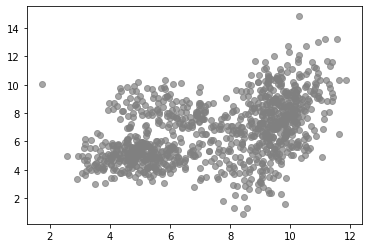

In [3]:
%matplotlib inline

X, T = generate_data(n=n_true, mu=mu_true,sigma=sigma_true)

plot_data(X, color='grey')

# Introduction

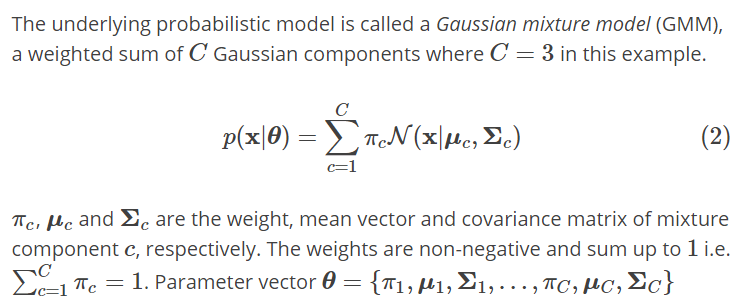

If we introduce a discrete latent variable t that determines the assignment of observations to mixture components we can define a joint distribution over observed and latent variables p(x,t|θ) in terms of a conditional distribution p(x|t,θ) and a prior distribution p(t|θ)

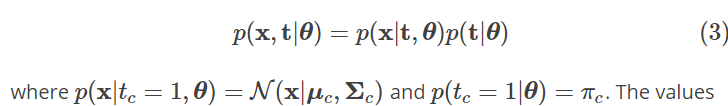

The marginal distribution p(x|θ) is obtained by summing over all possible states of t

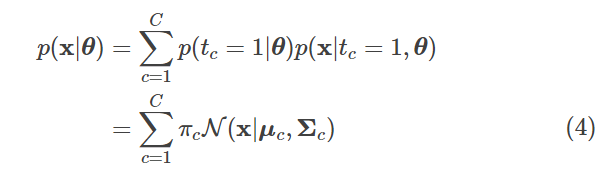

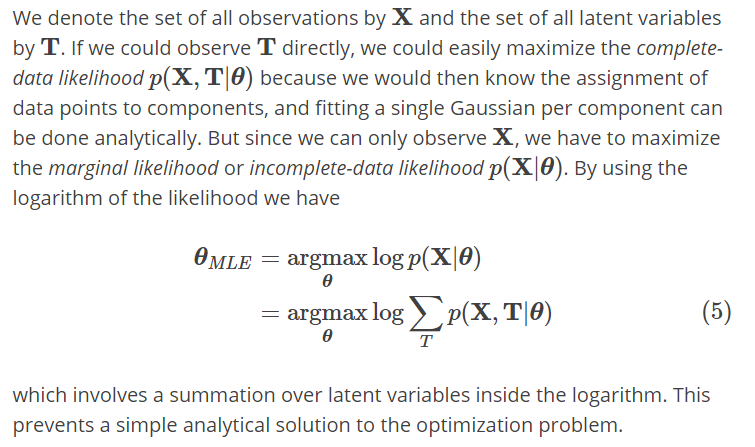

# E step:  Posterior probabilities of latent vars

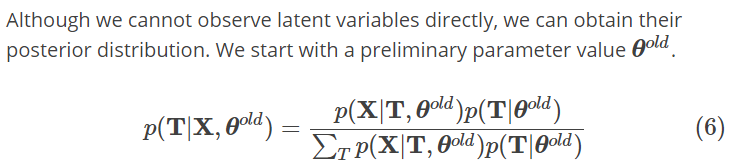

Denominator:

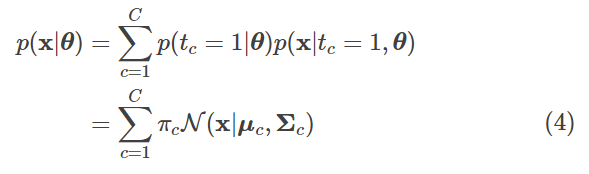

### Initialize model parameters

#### Random init params

In [9]:
N = X.shape[0]  # number of observations
D = X.shape[1]  # number of features of observed data
C = 3  # number of Gaussian components

In [10]:
init_mean = np.mean(X, axis = 0)
init_cov = np.var(X[:,0]),np.var(X[:,1])
print(init_mean, init_cov)

[7.52911855 6.72698796] (5.199567755595092, 4.636257176667938)


In [11]:
mu = mvn(mean = init_mean, cov = init_cov).rvs(C).reshape(C, D)
mu

array([[8.53286273, 6.27804077],
       [4.39269701, 5.63046875],
       [6.41702982, 2.25029224]])

In [12]:
sigma = np.tile(np.eye(2), (C, 1, 1))
sigma

array([[[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]]])

In [13]:
pi = np.ones(C) / C  # prior probability of join distribution
pi

array([0.33333333, 0.33333333, 0.33333333])

In [14]:
q = np.zeros((N, C))
q

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

#### Compute posterior probability over latent var

In [15]:
# Equation (6)
for c in range(C):
    q[:, c] = mvn(mu[c], sigma[c]).pdf(X) * pi[c]
    
q[0:10,]

array([[2.36718229e-04, 2.75328222e-02, 4.73601465e-04],
       [4.99203297e-03, 3.43982791e-03, 7.86389904e-04],
       [1.38801000e-03, 6.36131609e-03, 5.97188240e-07],
       [4.29351542e-06, 5.20084241e-02, 1.09379754e-05],
       [1.59072785e-03, 5.59743321e-04, 7.83389940e-03],
       [4.95377210e-05, 2.65644101e-02, 1.10772180e-03],
       [1.08540208e-05, 5.29240893e-02, 2.58111959e-05],
       [8.96858021e-06, 8.24906833e-03, 6.52368168e-03],
       [2.71312669e-05, 3.54769371e-02, 5.14794548e-04],
       [8.15758271e-06, 5.33547851e-03, 9.87963599e-03]])

In [16]:
q = q/np.sum(q, axis = 1, keepdims = True)
q[0:10,]

array([[8.38144106e-03, 9.74849834e-01, 1.67687245e-02],
       [5.41537987e-01, 3.73154082e-01, 8.53079312e-02],
       [1.79099837e-01, 8.20823106e-01, 7.70573100e-05],
       [8.25300600e-05, 9.99707220e-01, 2.10250034e-04],
       [1.59321796e-01, 5.60619537e-02, 7.84616251e-01],
       [1.78696744e-03, 9.58254335e-01, 3.99586972e-02],
       [2.04944603e-04, 9.99307691e-01, 4.87364581e-04],
       [6.06734606e-04, 5.58058813e-01, 4.41334453e-01],
       [7.53251622e-04, 9.84954389e-01, 1.42923598e-02],
       [5.35862636e-04, 3.50481715e-01, 6.48982422e-01]])

# M step: 

### Expectation of the complete-data likelihood w.r.t the posterior distribution is maximized

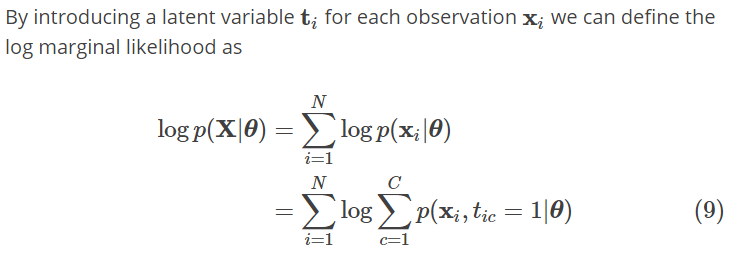

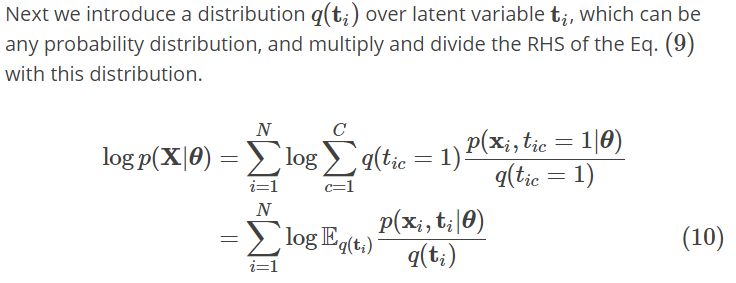

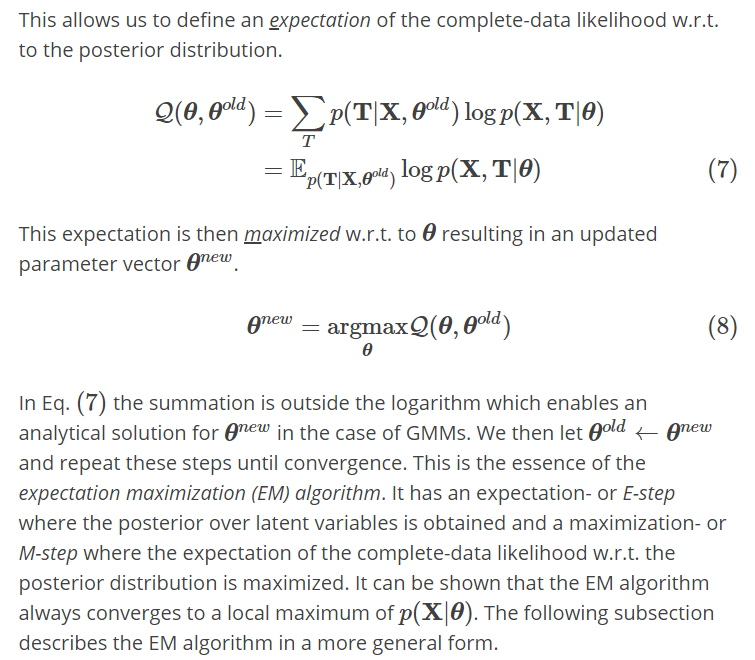

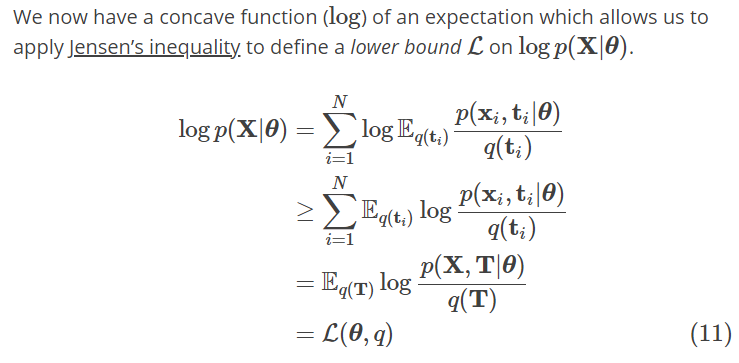

\begin{align*}
\mathcal{L}(\boldsymbol{\theta}, q) &= 
\sum_{i=1}^{N} \mathbb{E}_{q(\mathbf{t}_i)} \log {p(\mathbf{x}_i, \mathbf{t}_i \lvert \boldsymbol{\theta}) \over q(\mathbf{t}_i)} \\ &=
\sum_{i=1}^{N} \sum_{c=1}^{C} q(t_{ic} = 1) \log {p(\mathbf{x}_i, t_{ic} = 1 \lvert \boldsymbol{\theta}) \over q(t_{ic} = 1)} \\ &=
\sum_{i=1}^{N} \sum_{c=1}^{C} q(t_{ic} = 1) \left\{ \log p(\mathbf{x}_i \lvert t_{ic} = 1, \boldsymbol{\theta}) + \log p(t_{ic} = 1 \lvert \boldsymbol{\theta}) - \log q(t_{ic} = 1) \right\}
 \tag{19}
\end{align*}

A joint distribution over observed and latent variables p(x, t|θ) in terms of a conditional distribution p(x|t,θ) and a prior distribution p(t|θ)

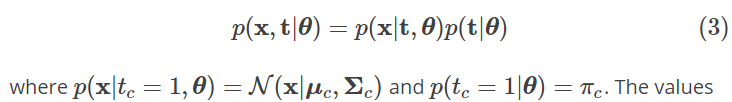

The marginal distribution p(x|θ) is obtained by summing over all possible states of t

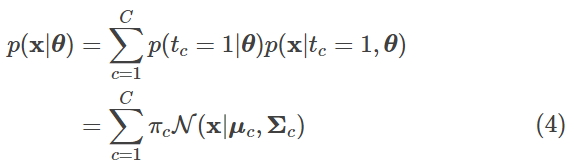

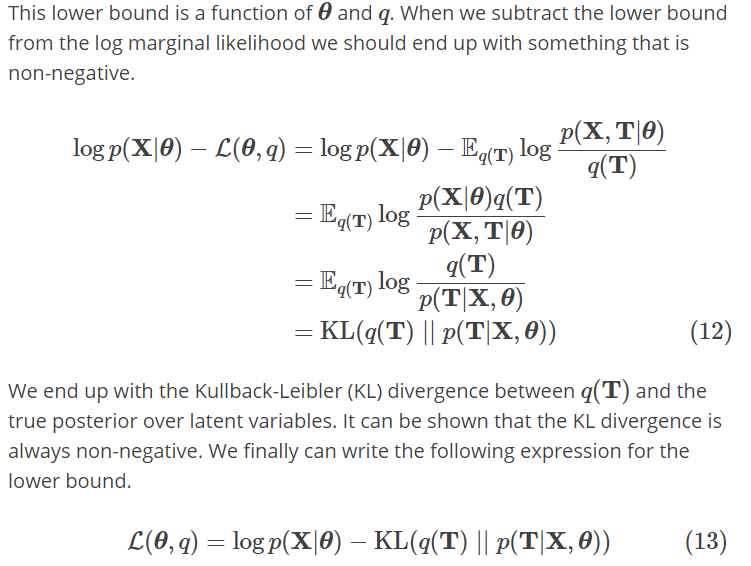

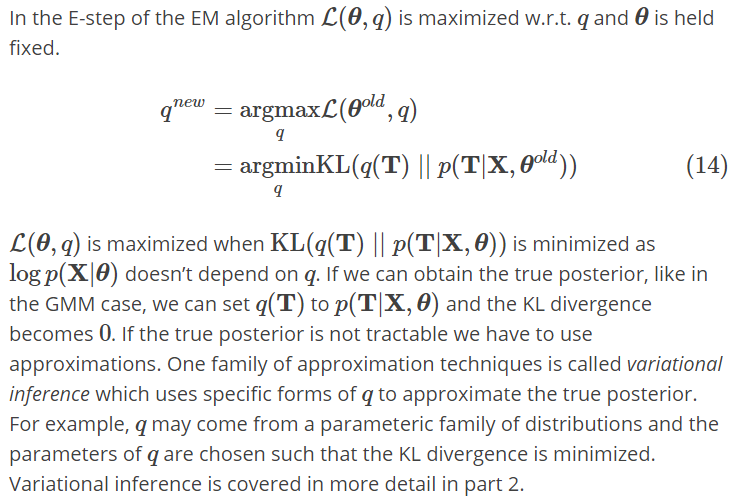

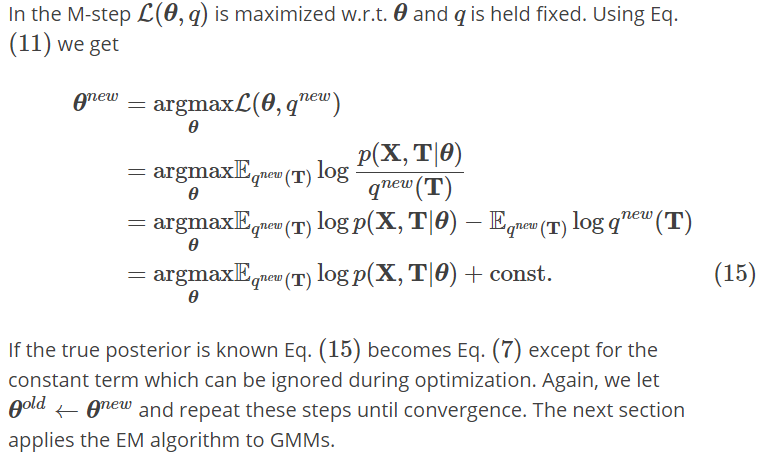

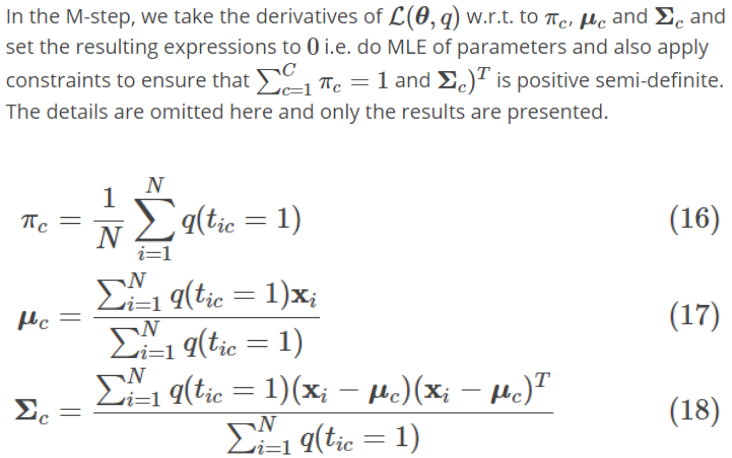

#### Set of best, final parameters of model

In [1]:
q_best = None  # posterior probability of latent var distribution
pi_best = None  # prior probability of join distribution
mu_best = None  # mean of Gaussian components
sigma_best = None  # covariance of Gaussian components
lb_best = -np.inf  # lower bound value

NameError: name 'np' is not defined

In [19]:
sigma = np.zeros((C, D, D))

In [14]:
# Equation (16)
pi = np.sum(q, axis=0) / N
pi

array([0.26264632, 0.01891676, 0.71843692])

In [21]:
# Equation (17)
mu = q.T.dot(X) / np.sum(q.T, axis=1, keepdims=True)
mu

array([[10.06004978,  8.58816628],
       [ 8.2283907 ,  2.76740213],
       [ 6.65449094,  6.14084952]])

In [22]:
# Equation (18)
for c in range(C):
    delta = (X - mu[c])
    sigma[c] = (q[:, [c]] * delta).T.dot(delta) / np.sum(q[:, c])
    
sigma

array([[[0.29772031, 0.10577686],
        [0.10577686, 2.90243794]],

       [[2.32263722, 0.28610607],
        [0.28610607, 0.40167284]],

       [[3.762588  , 0.80105838],
        [0.80105838, 2.80533257]]])

# Computing the lower bound 

For computing the lower bound, using the results from the E-step and M-step, we first re-arrange Eq. (11)

\begin{align*}
\mathcal{L}(\boldsymbol{\theta}, q) &= 
\sum_{i=1}^{N} \mathbb{E}_{q(\mathbf{t}_i)} \log {p(\mathbf{x}_i, \mathbf{t}_i \lvert \boldsymbol{\theta}) \over q(\mathbf{t}_i)} \\ &=
\sum_{i=1}^{N} \sum_{c=1}^{C} q(t_{ic} = 1) \log {p(\mathbf{x}_i, t_{ic} = 1 \lvert \boldsymbol{\theta}) \over q(t_{ic} = 1)} \\ &=
\sum_{i=1}^{N} \sum_{c=1}^{C} q(t_{ic} = 1) \left\{ \log p(\mathbf{x}_i \lvert t_{ic} = 1, \boldsymbol{\theta}) + \log p(t_{ic} = 1 \lvert \boldsymbol{\theta}) - \log q(t_{ic} = 1) \right\}
 \tag{19}
\end{align*}

In [31]:
ll = np.zeros((N, C))
# Equation (19)
for c in range(C):
    ll[:,c] = mvn(mu[c], sigma[c]).logpdf(X)

np.sum(q * (ll + np.log(pi) - np.log(np.maximum(q, 1e-8))))

-3917.134068240464

# Training model

Model training iterates over E- and M-steps alternately until convergence of the lower bound. To increase the chance of escaping local maxima and finding the global maximum, training is restarted several times from random initial parameters.

In [23]:
init_mean = np.mean(X, axis = 0)
init_cov = np.var(X[:,0]),np.var(X[:,1])
mu = mvn(mean = init_mean, cov = init_cov).rvs(C).reshape(C, D)
sigma = np.tile(np.eye(2), (C, 1, 1))
q = np.zeros((N, C))
pi = np.ones(C) / C  # prior probability of join distribution
lb_best = -np.inf

### Other parameters

Model training iterates (max_iter parameter) over E- and M-steps alternatively until convergence of the lower bound. to increase the chance of escaping local maxima and fining the global maximum, training is restarted several times (n_restarts) from random initial parameters

In [9]:
n_restarts = 5
max_iter = 100

In [24]:
for _ in range(max_iter):   
    # e-step
    q = np.zeros((N, C))
    for c in range(C):
        q[:,c] = mvn(mu[c], sigma[c]).pdf(X) * pi[c]
    q = q / np.sum(q, axis= -1, keepdims=True)
        
    # m-step
    pi = np.sum(q, axis=0) / N   # Equation (16)
    mu = q.T.dot(X) / np.sum(q.T, axis=1, keepdims=True)  # Equation (17)
    sigma = np.zeros((C, D, D))
    for c in rdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAtwAAAGcCAYAAADqGXeYAAAgAElEQVR4Aexd/4dby/v//Gnnp0MJSygb5R2lURr9IZRQlku4NEpjaZR3lNpL5bJS3lJKKKGEJT9cudReKqVSLssSSlheH/PtnJk5c74lJ9ns7lNqT86XmWde88zMa5555pn/A/0jBAgBQoAQIAQIAUKAECAECIGtIfB/W0uZEiYECAFCgBAgBAgBQoAQIAQIARDhJiUgBAgBQoAQIAQIAUKAECAEtogAEe4tgktJEwKEACFACBAChAAhQAgQAkS4SQcIAUKAECAECAFCgBAgBAiBLSJAhHuL4FLShAAhQAgQAoQAIUAIEAKEABFu0gFCgBAgBAgBQoAQIAQIAUJgiwgQ4d4iuJQ0IUAIEAKEACFACBAChAAhQISbdIAQIAQIAUKAECAECAFCgBDYIgJEuLcILiVNCBAChAAhQAgQAoQAIUAIEOEmHSAECAFCgBAgBAgBQoAQIAS2iAAR7i2CS0kTAoQAIUAIEAKEACFACBACRLhJBwgBQoAQIAQIAUKAECAECIEtIkCEe4vgUtKEACFACBAChAAhQAgQAoQAEW7SAUKAECAECAFCgBAgBAgBQmCLCBDh3iK4lDQhQAgQAoQAIUAIEAKEACFAhJt0gBC4rQgsZ+g1quierfa+hKtpF403UxQi6Y8hmo9bGP3Y+2IXJ+AW6rrQOimupGZKO67r5V89NB52Md1AURf/a6L5v4VZjjV/sbRqrREWV2smQJ8RAncMgcWnFmrPh1i7BW7Q5xDhvmPKRsW9Iwgsp+gc+ii/mmJ5A4q8OK3DezJI7wSvlpiPemg+rqDke/A8H+XHLQy+mqVk6fn3GhjcBdK9pbrOXCdb1K/F2QDtRgXle6KuS4cNdL+YQ+Wu6np51kHFL6NzZupa3uJPX3nwXk3TP8ui61cLDJ768J8NiHSnI0pv3HEEFh8a8P36xuPCun0OEe47roBU/NuIgBiEvYcnmN8Qy1cmcvfvBJ1HPjzPg3f/CP2zc8ze1eGz355NhJYYt3x49zuYbsaP9lxBtlfXmepkW+gszzE4Kou69mvojM5xPmqhzOvaR/1UJ907qOufA9R9D9V3841LnIlw59H15Rgt37sxk+uNAaQECIE1EFhNOyh7Plqf3QPC8usQ7UZZjice/IMqmq+HOL90ZbZen0OE24Ul3SMEbjACiw+MhJbQ/ev6CzH7bwWVB0cY/pssSyq5uxjhiFs5PXjMQvFTpnc1Q/eAEW4P3kEXM32CcTFEw/NQelWQq0pyEa7l6TbrOq1OstZtbmCuZugdyokVm0gF/hsXGD6Tde01MLzQUt5qXctJja1fWvbsMiseqYR7DV2/+NiA55XQuQHuYxZs9JMQ2D4Cv6bo3PfgPRtC7zZUxsLyXcHR6QwXzF3saoHR73LCf/8IIzXeqA/Y3zX6HCLcOoB0TQjcdAR+CWtXXMey2+ItMHjCCJJGkGMESCZ3kvBw66aHxke9y1R5sHxK6P5tZjB7XYLnVdH/bt6/Fb+2XNepdZKxbvNhvcL0WA50bLL0emZ8zsmq1IPmJ9NSta26Xo1b3Opl6p0hFgClh+m6nky419R1NfF82MfmNni7bPSbELjZCMzfV8X44DJCqX70fgMnf2l9iiTUzJjj/z527i/K2+cQ4b7ZekTSEwIGAqJj8dD6vMGuLiPFDX4EHVY6CUkidxefmsEyn+e3MP6ly6SIjrB82iQM305QSegw9ZRu2vW26zqpTpR1J8tkKheuf3el2wirz+hESSfcpTcmGd9OXc/Rf8hksfXOKlUOXU8i3Jvo+vxdhe9paI33oO1b8NBPQuDaEFCE+sGJezI67YTjC1vFCgSdoiMn957XgXPXRc7xhQh3AC5dEAI3HQFFDpoYOf3Odlu+2RtlqdyAcDPLHVsKlB2fbfEE9E7Rs3x7WXmly0mEqO8Wi+Jz235dJxHuPHWbvewXGDWVK4lr+decXEU3Hm6hrr/3UWW61xwlbj7Og0cs4d5U1//uonRLJ5fZdYjeJARMBNQKVWSCrl4LJst2n6ONLQYRVx+yv/n6HCLcOnZ0TQjcZATYxi5GDh7106N9bLOcqwvM3jdCq8EGLiWqsxSE20fnzBL8Rx+1wArhof5BdzcR705eMMLu+NZK6kb93EFdOwn3GnWbGVdFbmV9mhsjmV/lBG2trv3jqM2p6LrmGHgean/qmzS1Eq2BRxzh3ljXFT5+B1N9L4MmLl0SAncNgekrMYlvTxJK/nOGyZeZGelHG1viXEpYinn6HCLcCXVAjwiB60Jg8ekIFRb2zi+h/naK5RUwH7VRPxCdh39QR3tkemsuPzW5JdhFRGxLsLIYs7+C2FjWQ0VssoTq00FSRFB97/rrCInmJHdYYdwKrduuZf3V51Zg/WZliRBytrflQ52/UykgwoRe1KKui6/rmLpkdSGx110zQl0wl00jdbJm3WbFSbhEqPqu4OSb9aVcvlXyRgh5Ul2zTVC/VfgkkLWdHgtdczXH6GU9CC9ZetrGyPD1X2LUlJO1KLcH1sTDTbiL0PULDJ4yeR3YWVDST0LgbiCgNtXXMUjZuG/jMX/H/L7lJv2E8LJ5xhci3DbK9JsQuG4EuKWvjv6PJUZHYsCvHJbhP+pg8mMFXC0xecE2A/qofwgtb7M37J4i0HYh5hgdd9A5bqOhuWiwwbk9YRtFlpj+0eT+zizd2m/s3Q4673PG8b5aYXm5xHKkE+ES6i9keizNT+ZEgUkaIXfs5tUUHR5rW5IwNsngZQjTOlJhAjmxj+lUzzqi42y5N77YSO3091bqeonpe4GRiU8JtVOB/Zwd/lASuJYbbVHXxyPDxzFSJ2vWbTY87UlCFU2rrlnILkW2+YqFiwTH1DX3d3/Sx+JyhCM+iFZQue+jdjzBgrk8X07QZtFu9Ag4ark4boVmTTychLsgXVcTqb3Yw5Gt4uktQmB7CFyO0ORjg2lMSMzwaoWFCkHqV9Lj7sf0Oa48iHC7UKF7hMA1IsB2PoslLGVh8+A/PcG5toEaqpFrvmViaSvDhskfIqawIi/8cBx5gAa7V8hhOUo+RYRdYZU0jCPkjj2TPqlKztS/cZtilGU0h7V+cVrTyJ0k/LwsWa/9TGEZt17X7FAcbYLlP2UHpCwxfSXIq/itVYR26awT9jxn3WpJxl8GA2NWfGM2Mbrqmkfw8ME3Ewb5+Ki/Ozf8shVZDXw9lYtG2obJnHg4CXdBuq5WCVzW/3jw6QkhcEsRUG4hcWODUexz9LS+0ivV0TuLuigan7Afrj4n8pK4QYQ7Bhi6TQhcDwJiCYxbqIIB30GiJ21JCNWGxNBC6HKrsMvCTs0Th4gwglNC7ZEkYEWdWJeThLjInXKREUTb4YNtLekHRMkubPBeDiuHncZWfu+mrmFNsKqPasK14jD5UCBXnXAYctZtJugswhkhjLYFOG4To6uuedqSoAftJkrY1YQ1OPHUlZarMDnxcBHuonSd1xmbGDrctlyi0z1C4FYjoNpmDmMLx+PqAtM3sp/8TxvjJHeUrP0EACLct1rbqHA3GoGAhESjjihLFg/LxjuDfISb4cIGZ3FKo7AqJlk7c+OoOroNLNzKRUYQ7igGJklJOOgnR4eYu5xFfbDlujYnWOykzmSyrfQjIJ96OXPWrf5p3HWkLq146vZqR2xM7JS6DnQqQtjnOHkgretPB+JwjJS0grLkxMNFuAO5eHtZX9eJcAe1QheEQLgal5dwc+y0g7YMVzML2Kz9BBFuCzj6SQjsEQLB4BmJOhK6mvDTFbnM+Qk389ue/C78vjmpzUDCMsOTk4Twslqdolri57JFlgStTWZJB37k6BAzl6/gF7df18D8veYmwwaQhI1ArHiuOuHFzlm3WaAKys8JZ9T6HE4wmZ919HmQR2Jdh20kEnUkcDXxEKyUJKYV5BgO6hknly7CXZSuBziShVurILq8swiovsoaW7Lisfgz7DOjIWllKln7CSLcWWGn9wiBXSMQkuqAACgRWCB/PrjrJ/GF72dxKeFJWa4GjNgWZuVWHZ1FQuaf2Ga+PqZWnHAXuTNIiL3hUY+dmnakteoQNX93BeV+/A3rbmt1bflyZ5lgueqE45WzbrNgHBBFpi/25Eqdoih1PuJuomeQVNcBqY6eSBpGu9FWSoL3U1yRcuKRSrg30HWFY0SPdIzomhC4KwiolcMEwr341EL1oIRyo4eZvk9KGR1kv+Nc7WM4JvU5Fs7kUmIBQj8Jgb1AQPNZteOHLj+Lo6Y9v4mRtqdDEdREQqIKFxCwMjqnJ6hr0UC2uWlSyKj8zpUwbmuqCrfEyaFlsQtCNrFJQmtsbH4LU5VXihAldLr2N7vaNMnz3XZdBxti2UbBgWMTpV168Tsv4Y6rW3fq1l39tDerngJ9ZwPfwxPMk2JMJ9X1mTpRro2JkcYS45YMt9kcCXcSLp46+CKqr4b0Kk8+MIfvxuHB71v6XJSuizzjIhUZUtMPQuD2I6DIcNxJkSkHp+kWbt9qswF4qv1b/VbwXLsgwq2BQZeEwN4goGbmnmZxY8IFp9GZIQHZI2XdSo03zcj2ISMYPhoyrKDp4+s7TmwE8GOE1uMKKo9bGKW4I0AnUEFYNeUGEvVRdZI73Yr9bBgSIc0y76ds/GO4BNbLF0knH1xjzW+zrhnZfibqunIsQzxq+LHJTNwEy1knDKY8dbucodeooPKggd5flvlIh1y3YrOVCEWIg4mhB+9eI9UNJqmuAz9pPX0mgzpOPuKnqVxQUuJa58GDwffKsamxEF1X7cuDPUnXoaZrQuDuIKAmzXFuaKGftv+fLlh4/vBf+IztlerHjHlJfU6Ylrgiwm0jQr8JgT1AQJFn4ebRF1a91TwgT4ooG6Kqgd9ekmYvXU7Rl3GNg9jMD5o4UT0Mi0OsNo1xS10ZjZcilvNIHkCirGfc4hzZdGZIok0MxEa08u8jnP/dAzsJ0zesiOK7OHLH7ouNnWW0Ruc4H3VQk9Z4/1nfDJVoiaB+Kv9f1ymU6p3r/Ft4XUPFXO8giF1dqqEVxD+fY/BY893X4q73lT6oCZzLahNM+tLrVi9buN/AjXY46WOW+BnOz/o4kmG6/MOUSAEyyfi6VuSZyeyj/qeIR776NkDjXjyZnx4Ly3diXOsceDAxnYRb4r2ZrquNnzHx6N2w011C4BYjkOEwqB+iD/AfdzH6Z4EVm+yvFpgciyglnl9B+7O2lGyhFd/nWC+SD3cUELpDCFw/AppP74s++s2SJJ0+qs97mMTFtGa+3YyMunyVg6U1GYlB+qUF7icxzxm5Vj7hISFiG9dS/FoZiP9O0HteQ0WejundYyR+5HQJiCPcLJnFlx6aj8sCA7+ESqONwVl44E9yfSksq+gbpwgmf7W7p0o+D6Wi6tpaJuUTJFbfwZKosvqYusDeC/QhiXAzcLLWrWFNTyeCy69DtBuV4PTH8uMmeqM5P2k1vU4Ulo66DvyxS2j/2Ucz0Mkqmm8n5pHOWkbquPVUn+iseCQQbpbtRrquypi0gVgrG10SAncBAX7oleeh+ckwX5tFv1pgetpG44EcZzwfpcMamm9HmFv7jcwPE/oc80X+iyzcDlDoFiFwrQgk+PQmy7XC+HdmkUtZAk9OJPkpO11v3M5GuJNTMp4mEW7jxbw/1AbTfSUhe1zXhdUJ05l/+qgz16KkeLZ569Z+P6muY/237USs32oSa2/ktF7L8zPOwp0nDde7amm7+j56kqvrfbpHCNwJBPhpvh4818rvpgAk9TmOtIlwO0ChW4TAtSIQ+PSuQVD+6qLk6dFLii8JX0JLcynJmW1h5M7KV8R39tH8FL8kaH2y2597XNdF1gkng66VlwLRTqrrwH9bxdjOkS87DZQdDtX9K8dHCa9uh3BLS5u1kTpBDHpECNwRBJQvdgPDgoeBpD7HBS4RbhcqdI8QuEYEONFhLgBrWdUuMGr6ybGKNymb9FeNPXhkzbSLJHehCHP0H7JDXrRNeOHDvbja57ourk6ETsbGsS2kJpLqOvTfTt1Q7JLlYoSm78H/fYyV63nOe1sh3NKKV34zyykNvU4I3AEE5MboYld/kvocN6ZEuN240F1CYPcIsKX3y3P0n0jf2udDLC6XWOYd5aXfbPVd8UvLjIT5WyCwxZG7sNpEOLkyOtO8AIZpbO3qhtR1bOzZHMBw3/8tW15j6/rXUrqziDbV/N8Cy8ul2BiVowxc770qTuQG4hyfRl4tnnDLsIbs4KpfkezoBiFACGCJ6auyMEQluHLnASq2z0lIhAh3Ajj0iBDYJQKcdMrNjMFGN7aR7UP+dbCL0RH8gghCgMHFEM176ScUBu/nuCiccC/ZBlIf9ffzQqySOYqS6dW9r+u0TZOZSsl2+8/QPSyjc1bQKOfKN7auQ8u23p5YiK/8vuQXGB356XHAXfJZ94om3Hzg9+vof9vDiaVVdvpJCFwbAlcz9A799HMbsggY2+ckf0yEOxkfekoI3FgEFh8a8O93MEncZb0fxSuUcMs440Hc6f0o4lal2EZdF1on2yr9LutaxjQvv5pkjJriLnSRhJutHlTuVbY7oXEXg+4SAjcPAdlfqLCgaxVggz6HCPdaiNNHhMDNQGC1XMMl5TqKxlwsiloO5+4ad8/aV3hdF1kn29KpXdc1zy+/S4pR/FWBbZK5zBTVbgwh6QchcEsR2LTP2OB7Ity3VKeoWIQAIUAIEAKEACFACBAC+4EAEe79qAeSghAgBAgBQoAQIAQIAULgliJAhPuWViwVixAgBAgBQoAQIAQIAUJgPxAgwr0f9UBSEAKEACFACBAChAAhQAjcUgSIcN/SiqViEQKEACFACBAChAAhQAjsBwJEuPejHkgKQoAQIAQIAUKAECAECIFbigAR7ltasVQsQoAQIAQIAUKAECAECIH9QIAI937UA0lBCBAChAAhQAgQAoQAIXBLESDCfUsrlopFCBAChAAhQAgQAoQAIbAfCBDh3o96ICkIAUKAECAECAFCgBAgBG4pAkS4b2nFUrEIAUKAECAECAFCgBAgBPYDASLc+1EPJAUhQAgQAoQAIUAIEAKEwC1FgAj3La1YKhYhQAgQAoQAIUAIEAKEwH4gQIR7P+qBpCAECAFCgBAgBAgBQoAQuKUIEOG+pRVLxSIECAFCgBAgBAgBQoAQ2A8EiHDvRz2QFIQAIUAIEAKEACFACBACtxQBIty3tGKpWIQAIUAIEAKEACFACBAC+4EAEe79qAeSghAgBAgBQoAQIAQIAULgliJAhPuWViwVixAgBAgBQoAQIAQIAUJgPxAgwr0f9UBSEAKEACFACBAChAAhQAjcUgSIcN/SiqViEQKEACFACBAChAAhQAjsBwJEuPejHkgKQoAQIAQIAUKAECAECIFbigAR7ltasVQsQoAQIAQIAUKAECAECIH9QIAI937UA0lBCBAChAAhQAgQAoQAIXBLESDCfUsrlopFCBAChAAhQAgQAoQAIbAfCBDh3o96ICkIAUKAECAECAFCgBAgBG4pAkS4b2nFUrEIAUKAECAECAFCgBAgBPYDASLc+1EPJAUhQAgQAoQAIUAIEAKEwC1FgAj3La1YKhYhQAgQAoQAIUAIEAKEwH4gQIR7P+qBpCAECAFCgBAgBAgBQoAQuKUIEOG+pRVLxSIECAFCgBAgBAgBQoAQ2A8EiHDvRz2QFIQAIUAIEAKEACFACBACtxQBIty3tGKpWIRA0Qisvs8wOu2hc9zD+GfRqVN6hAAhQAgQAoTA7UWACPcO6nbxqYXa8yEWReX1a4puo4vpr6ISpHQyIbCaovuwgd5fy0yv35qX/p2g+9iH53nyfwUn32JKt5yh16iie7aKeSH/7dW0i8abKYpLMb8Me//FXdXNdSpmCzq6jhj79s3if000/1fMKMXSqrVGWFztWylJHkLg+hAgwr1l7BcfGvD9OgY/Cszo5wB1r44BWRkLBBVYnA3QblRQvseIpY/SYQPdL+YAtDzroOxX0Dm7oaT7xwhHhz6qb2bZCOzVDN37imiLv/7TgXvyuJyic+ij/GqKItFZnNbhPYnJs1ANuNmJ3Xjd3AX8W9LRXYi+7Tymrzx4r6bp2VzOMXrbRO2wBJ9Nwu+VUWsNcH6pfXq1wOCpD//ZgEi3Bgtd3m0EiHBvsf5X0w7Kno/W5yLpB4C7SriX5xj+d4BZ0Zb95TkGR2VhvfVr6IzOcT5qocwtuj7qpybpnr+rwit6ErVFPQyTXmHcUuS5hXEGHC8+NuAdtDD6vsQy8X0xwHoPTzAv2Kp1swj3BQZPFcbr/vXRycB7wnoNr26uboZl2N7V9nR0ezIXk/LF5AS9sdmP2SlnIdwXkw5qvtDr8lEf039mOHkqV7/udzDVh7rlGC3fK3wCbstNvwmBm4IAEe5t1dSvKTrMMvhsiIui88hAuJdnXdQeVApbIiy6CHnSWy3nmJ62UeOW54It+1cz9A6Vu0QZnalyXLjA8JkiTA0M9UpkVt8D7wZaXRfoP1Jl8tD6rMoaVxsLDJ54KL2Zxb0Q3F98qMP3Suj+Fdwq7OJmEe4Vpsdy8ha44DDMK2i+6qBzbP9vofGgLCyF2vvNTzpzyQHljdXNHGVc89VMOsoss88rqDy+BS57Vyss/hmh16wI/UqxXqcR7ovRUaCnxirXX12UpO6WXpt9BZ+weyV0CnQxW7P66TNC4NoR2CLhFoP1XV0Knr+vwtsSAUm3cEvsPQ+1P5OtGteugQkCcKIlrcylA0WKiyTcJjmyBws+AMmBxCZAYiDx0RqnkdaEAu780RQdjdT5KQOw0LMSun+nCPpLWLK2MrkEcLMIN4CrC4x/j5Lu8lGCT+vVApPjWkBoNmm3N043uQHBQ+csRc82eZxVR886sg7amBS8UrOJ+Pm+1dr5vRJK0iKd5i6SSLhZHal0PMsAIeuP7/E46MKg3GoC+LCPeb5C0NtpCJx1+KrsVttNmgwFPBfjfJHjegFCbSkJItzbAFZ17g9OttPJpFm4L0docmKVgSxto/xFpblaYnkpCa3sXLwifdf/7kq3EWaBrKL/3RRcJ9wRKy+rY4bxTRpI9IGRye53ME0gFcKdpItZwjsMMTG5zGIxN/HN+uvGEW5WMOnDGm40FSsLyf7tS4xbcmKZNhlKAu+m6abUy20Sh6w6OntTEq5lzVGh+xCSqmsbz1aXSyx51xkaX9Yn3BcYNZXBw4P/+9jc/2H0K02MdF9u1j+8q/A9MTfLOLGNWklKU6snzShi9x/8t9rPQoQ7CdC9fEaEewvVshq3uJUkQtKKyiuNcE/aMppENj/dosTaajqFE25zEIlaZ60OMEKAlhg13UR9qzhskjjXiwo6r5pSP/wEq6IoX6oVHHP0HzIcogPtJqLq395Iws0KwDboWRtO2WZce0+AXlZ8O0GFDbgbEb4bpptbJ9xZdTR0uaq8uy32WK0fi/RhhuYh1sJtGCYcbmNB38z6AYel8m/hchIh6mb2d/zXCovpBJMv2v93Dd5PN95p99jz6UJMeIhw3zidIcK9hSqbvhLWgPZkC4mzJFMI922x0hjoBZ26o0M3Xsz443sfVc2SECFBVxO0tef+cXQX2+LPGu8QI99mFGHXrwl525j8O0RDli2WUEsraaqft7JuPeq7I5cUUMgbS7hZ2X/oS/HCyu155YQoN1N02NL9hnjeKN3cNuHOqqO3ZWXQaHObEu4Vxr+H1m3XqpjSNWGNrWPwryEAoPrSlBU16yv6mUao057fEATJpQSAII0OC6mywKhlDa1SLz7U+eYgEaNXNnT23uU5Bq1q4EvmH1TRfDvBhWup+mqJ849tNMqykfslVJ/3MLEbMVc22bi/D9F6KEMU2XL9nKD3XMu73ED743m25UIWr1XGH/b/08KQuRxcTnHyvCr9/HxUn59gaiyhyQ11bKZvy6z8UTUiFy4ZdcApXUAs1eAs/hrLrQ7CrUh+mJ7+/fpRD7Tqvd7LAJdiCLdY5lQYOeJKKz2XdeUk1VPp79myllivF6mY3GWEkqcDXEDbEOo72jhLgfuyplutl5+Etdw1IQG0wd7WeWlt0912Qt2VbUGWJJ1wLzF7W+f9i39oRUpQaXxuo/GggsbbWba2H4PiOrd5uD67/LFRbpSl63yzzdbr6CYL9/ZHCw0V7s3z4JejoTFVvfIVvMtzDF82ZChND8l9+wKT1+a7rdNzLNmkxMvmw734dIQKm5D4JdTfTrG8AuajNupyj4d/UEd7ZFqnE3VUkXG7ftRv3l7WqfV9+UZrg+tYuJV7ksIj0tfpkY9Yf2q2XYGCitzj6Gf3BSa2h4Lp/oMKKqn/a2iNdrA3Ko1Qa88XX7ohZ/J8lBttDL/GbLxehxMpX/xI/csKlHqi74NiYXa7z2tB38DabNUOHxlwImtc18oWVRG5R8Glz1nLxt8zZas8bqL3Wa4eRDMt5E6shXv1uSU2/VkbpjhR8X349sYJyIYXbJqQDf1BHfX7PmqtEwz5cskIgxdic1D52D7M4gLjVhmeX0Hz7VAsr3zsocmiSLABSo87zSukjv6EWZBU+kOcfDwPgfnnhIcw8h+3MRixZZkRBi/j8g4/E1diZl96McHya08s896voOKXcXQ6E5OF730+UHgsHJIKmRZYSVwdD1tl7otIBb+FG6QY0Sg9Hgh/728jtB5LP8L7DbRlVIORftCIg3DjF/N3XmL5TcrEdoZP5L3LJVauyY1d5H3+LRugc8kyt9zaIMQHkiqaVvSIdkPf9BYzYVGD9bZ89XOXK+GDK2E5VUvlYmMdGyDdGz/5Kok9eXUkr1ZTnBMSLDF9L6JyHD3SrGReCbVTQYrm7FCokpj4sEFCRPEYGXsfUgm3sVrh2LdgPHdPhB1FK/QWKwOPWayIC/trh1ErMsd1dPOvLsoHdbT+O8CI99VDeeCRrSOy/Tw5wtF9ZnToBX17/zcRESPStyufdkffXn5a5/2rYVRwYcHrsY7+jyVGR2FyCcQAACAASURBVEJ3K4dl+I86mPxYAVdLTF6wvtNH/UNIiBJ19Gol+s3LJSavZL/7bIA560vZf9Wvu+S5Efe0vs5FULQyOF1Kgk2koo2Wnqo2qqLtHAVhAvmEOWaCoibWqStmmjw7u3S6fonyhkYA/bePo5EetmpLkiaSTmEUYfLVn9bhHzbRPR0FnKnBXNlszsTE3IATzV6z9uE2wohJre5uxIw6rG9o4+SjcIkZvZeTZWvfk9PCnVj2GMKdtWwXIzR9DyEvnGDy8QTt51XU3puT9aJrNpZwQxJHNUCLjIUvXOVNl28YMyM3iAE9XKJWDd3ls6g2B5nWteVn5vvMOlSrmDKep+EDxivEh+/HLM9ezXHy0AMnzFZyPFatY5Oc8doFW3aXG+mkDxpbCm591huaKqOHAIsffdTYYJpKwpaYvtJInbR4BdawWAtYskuJmCixzsHE1ijb2j9WmLzUiZPeCWW9tna4Z5WlSMIdTIqyyhyDZWD9cU+unEX7MRD6oROvnNe+FXrLmY99k+uw5rOtYxDxF57j5IEHs+3bCYrfkxcCw9SB1BrUeFixq7ANiN/uPNIIt1hZU3UZrSvRocvngUHAndf27oZl1Qdx/+XE3IBWlADr6CbL256Ys3SYRdmwbIX9Xj0SBcndt4sJXgntiWV1k/00wySNcLMBX4wBykfdg//0BOd6kqqf0Oo5m44KnWdyZNH73NW0mqDNw5oqPV3j71ohZsO6WmfTpJqs6DqbdB2HnVpRdE/MXWjuaKxRB/SoSRuAYLM4F0usWAfju0vUbd1LJJ0h4XZO3L+dcJdJoz425URy1bfxUedArPByxdTmPHZfEmywN1c6CiHcOcomxos1eciGdR1PuNVysD4Yc6sJG7TZhjOrE5aVEQ68qqFHB0AmcxRk2Ynq+QWFk9Zz5gOm7kllNEi4esb+coLhsHaxZ1LW+gdbccIE+IxNKlDgo2YrFMJNNkFnpjr8DNbBSCSD/9SEtSDtJEOXhVuKHnSQThzD8t24K4Wra1NO3sIEEygx6EUGAWkNDgaWWCxV+C1r9SWvPDt4X7Q3vS3qvplW5xO08zTBVBtPJ0s8JcufufpIrPLEuYGo3Lnsse3JWtKO1JX5PDQIqNR3+FdZeeUEi53CV/QhQWFpitJNWccG/qredX0Kc4727dKlINJ/im/Uaksy4RbEh48vyifYc0TGCTaMqzapZE3R0WACGjNmhMW7YVdh+YMxKqYEUQt3OLHhfaHDB1vUtZo8xGMXvJdiZY8RbWu3l+M2Ko0+zgNyKMnjC7kBS/WFAfHYmijRhDMSboNUB6k4rMAbciKoDfL2xI8bJz1Us1iHHWWK9hfhZMLdJ2xWNhHUooT2F32mHgC31YsEwg0I8hZ2qgIY8Vu/ZhKKWYO+3CAbeszmnyjIaoBQjdf1N0q4Q4Jv4iTSd6UR3osQLTMJ+SvsdCJRRwIrkofAh1URQ2OAciYsblqWv+QNVTKdWMIdWmk2ieObIO31PVK4FkC4lU+nINSOQcIi5NEZvYJB6awa3NX9ffsr26JhpQRUNB2Gg95ZCnzCdh9fmnAwd3eM0S+DFRxl1c/gVsHbclx7siZHkTZtPY/rL6KSbuHO9wEa0spZ/n3s3sOCBYbs4JWHJ2Y849ziFKebnIgZ+K/Zt8eRLccgnFjcoH3q4434QllSuesZ30OTTUfDlcGbHH/bhVpY/vyEW+1HkmNmZDIbjo28L2WrCgFxNWUJxuM4HTBfv75fkjwqi7bQi2vq39PahXzuDs4QJaVBHai+1/E30n9aNSHCa5oGGjFhjobVtT4VPzl3MSe/Qi4L48Syb1g2Zvh4xlbqfTAXqcHZfGcut4mEW2ycUoREzvzUoM2txGqJWlqRDAuGbOhGRx1WQRRkCeKzEzM0jh4m54u2kSixQpQFvYL2/6yQOlp6U+b3l/ZPG7Ajih10/JpLiZQr14E/36UbCm8ALhccS8g4wn1rrTThjLcIH26z44kSy3DQZn5w0edhbRRHasI0t3BlDSJBDmojDNO7YLCUbTkyuAZfaRfhYJ6VcLOP5+9FdBdhNatjYLuQaTmwS15fMf2IWMlSk2jVV2kJaG00JGHa8x1dLv/qSl9XH7U3CRs31SQ+rryZ5V1DN/mmyTaajyvhRic1KBvyrNm3x5Et6YaXVYeC9hsx5mgEMHApyaajt3ZlUK1Us3qMw1/qVNTCrXRItK+IJVXpqtQRfdJuq2lQZyky2N/t+rcglCH5E2NB+Hun8qRwHMbPWB/qbjey7jS8RR1syInkWBISc9m+bKs367fPBui1Gqhom7B5n2/JLOSyMN5B2Zh87acy2Ma9KvgG7pgJY1H1nky4ZYPiDU2SOTXzY8sLzM9TLNEK/23TArxmp6wIfVoJEyskJNwiYkpaYgnPgwE7yZqizfjU+8YAlZA+21im+3LzzivGL10lE0O4b6+VZouE25gkMh9W06oTdiwKfP2vGpCiuqG/dd3XwgLhllFshGEDqtoYZ26uTJY9JDjuTt/xdWRFJ33zIO+QY9pTMJCzduNY8jYmT3ZdO8Tbxi0WWaMs2/XRp3Aznyuv5ehIxEjP2g+6EuH3cuqmdPdhm696HyeYfVcbrs9x8siDaUBYs2/XBn9DbBlRJZsOhTpnjjcANAIYRksI349P/xavDBZIuO3VIeUKJKzbWuAAo3LFD9VOI3XmePfabrG+n202DCZrLFob6xtr0X1luxAyheOsS7g340TS8Ko2PsoN6eYqsOI0PmovBxhNz7FQm5BHLBiHOUnITbhVO9f6E5GG6RueuYouZhjKYBrMRXmbjibJhBuys2qOsOBRS8xBm1sFmHIa1m5VzLydsvTzS7QoqrRDAhbbicpOPGnWraUWe6k6ikhcXG2zT/mNdpitXDJxh0eKZsPSZ9EL2OafgU6819g06bTS/NVFycb06gLT0zYaDxtoHbdQP6yj91cWNdvRRpYoTDxMnZgdWzNh17tp91TINEaCLCInNu5Ki+nDk2Qf25x1zcXa+aZJ2UHGWaz1CB6sE1VtOaPPohiQvOTDXFR9BD7MPurvBsahMOttmgzJFNcNqy7ZZp7BU1mXrI2xWOpqFcjG498pBi8bqD5rodOqo/K0h1mWJqHK5vy7xPk7GZ2E7cuwNwza32iTkcBFTX8nj4w5dXN6zJZYjzCKlFnuUzGwzdu3y/djJjzKUBDbl+sYJKw4Bm3Xb0IPIpGqo0onPH2FRLSbyPiRpw50uW/kpkmz/Rj1o41/fLL+OaI4euklcc3YT/Avdz/WKBc7fZ+H0p3I6nZQuiXmox6aT+o4etlG82EVrZRJdfBp2kXBhBsFcSLRXoULiVgRsFaB/xVhPitvtYhxqqxyj4WuS7kJt9yDZ6zYFFC287fsRFST4yqxi/qbQrgBsWGQhQDyETmNj5E5r4bOKxZ/2wJdzayNjjoU2wXyxacmJ5/Jxx/LNNKUUc1Wk4hrKE7MlTagW0smSlYjJCBPRVmWbDyiWSw+NATZVrGDA0IiSUKcf6vTwi0HNc9D4L8tO0UjksByhu4jH/7TviCTf/dEXNvI8mxU3mu9I+s70aWExU1vsDiqjeQJhG7FDlwprJMB7zVSXR3U5tvIZOxagQLw7zmm3+UAyHerK+u1S7AVpiocmuej9qjqaMuu78Q9NSGNLDfbn2h+c5XjqbAiWJso49o9z8PVj2ib51yE2/YXZxY65b+vW2SEu4eP+p8iJNTsrQhtF7QjVpasuqXKfXWB8e8yCtG9BvpxMXF5WLo5Zh+7qGlRLOyVlUwyqrzZXzUoZWzXglg4/Je/9sQBUQb+eQk3cyNieuVYubtaoP9E9Hf6IKwXxbhWK4iMHP+lPVH9vRUSkL2RqqNB3xKWn5P3gzb0OVLuOtDEu77LcFwwCIpDIK4DmtWQvaJbsfU2wzAVYS59BO3Zkaa4FW5cjieusR/v6IE0TFgbcRXhdlrmrxYYHZV5eM8JO4vjYoQj3oZDPVLCLz730PnvGIs8LgtpHCfxedSlhK/eqnCBKW58Sm7nX2Zh9tnkaYrBE09GDtLelJN9o/9kj6+WGLVElDO9rYv2aRnSZP9VjZz4qkJ/Wi5Sqv1vwPcE171mwq37SNqDAKS1wfd9x1HE+TtlaO4V/uNWEL9x+EcHrUYZjVNtOTZR2WTlqwGdxX59LWPLjgbovWyieqBtwNR0xbjUrCl8sJC978WXDiep7ugKyirgXt6Yf5LxS9lhEXyZuYRaK4w7PD+tocTvi0HIf3QkYhO/lySFCegk3GHUCU5+VnMMj8pgkRDCRq6OM2+Eh/L800fjcRMn02QLhYHLrn6s1LL2EvMP4phbz2OWwkUQO1ePL64GVk6+tGVBl7ghGWPW1hnOz/o4ksdw+4dtjB2HFtnpKMuc0xppv7yz3+oYa3b4QRM8Huv9+M1MXCymTyz0m9K7mFi6ziKo1QKnC8QcIxnfPIhrXqqh9UnFOp1joGLO87x91H4T7aOv6SOvV4PwSUkC8qVkL6P18RyLn+eYvBduHLxvkuU6+jASVnV95ULGZPWeDYJNjOfvG6hZB1rl0S1czeWmHCVX/r/G8n1GGfX6yaubyoBQbqiY2hMM3zZRuVdBhbULA/81+vZfU3T5eQraGQujAdqPfWSOw62RZ6argdFgpfD20dDibwd4JOoogGCVRxhJLs7Y5Kdinga6Rh0E+V/DxUot4f+coPNA6p8eX3wZ3b/kItxGJK37LYz+OcfoWJ0h4aPxPsshcspl53pi4GeCPzi+3jSUBavGumFGJjh7wybUJXTUauDFGO3HjcjBS4AywpmuFKlypXGcxOcOws0y3JQTSaH5QXv3yyh7ah+fVpqA/NbQVrHBZVv3Dyuc36QSbmawfcrIeRkNdSbLaIBuswL/aUOMV9bkMGvZFh+aRnzwyRfZ1/keIucHaMUq4jLVwq1ItduyGJK8yGxmDQu3KtDiSw9NdXIkGyzvlVF73sNY3+SYqGwqJXYypHkSGt+ZethAmx1eo73mvAwG9AZ6p21UpQWKn2bGTquMma0Ka462kVJLXM2YA3LDyUBI/t3PrQHPSbiFFe6EKaTErPHaOs1TDSyWtV4Tb68uDZIjSZOJm9WBqc6Ev5veuS+/DtFuVOQJqD7K7KSp0Ty2Xm1wRGecZD22v9jBb2ldCHFyWBUdYiz+ZKtUbGA2Dw1xvGrektYO3e8xfCEcaEJ5dMtEzHN2mIM2uY4j3IZ/tl9CRTudlp8a9mUBLEX7r/CTCNkkpGecDKvaqm69C+XXrjLr1hLj34QVxyhzjP663zEPWsosoyZuft1c4vy0hao8sZGdCldpdDH5KSNQbUq4mWyyLspBP6o2Kgk90AdhrSjaZbjiWHrRR78pNzx54vAdJqvzX6KOii8Wn9tyhcFH6WELA2tFYp06cMqyk5vx7SrQN6M+hVBOws0esVMY3zZRk+3LP6ig8XKAaRzedhmVy47y+7Wf78FvFcvff2HFxVcH/9hGC12nYnhAWKwFPwTGu3dkuDqFz2Ou0jhO4nOpAzYpZVltwomUqNy7Qd9srx7Iv/9O0G2U5SoIO7G2Jjclij1CelsX47xl4WbJRPqLChinWbDVUrYqtmbZVt9GfNxX/VDACRM4nVW6tX+mE+61k775HwaEL+OybFBiRWydVr/grfUv4gh3SoqqU9n2aUopYmz3MVui/4edtplOuDcTRFptbP/4zRIt4GtJnBip8StI26QXZHi1wPi/Jxj+ra0iBQ+TLtSk272ik/Rl1mduwh2SL0YidL/LrOmGPt419L9n+GpnuqXLolbMMsrIP91X3dTLtca1tuKYzzVhUx1dpw7WKN81fxJLuDeUS622RPzhN0y30M/liaP6iqlKn60WRO6rVZPfZbxu9TL9JQQSECDCHQtOOKDndxlQ/mBa9JLYfNZ4sCHhjgxWVxeYK5/fNcTZt094B5/iUrKxzHL1w9gwu3GiNzQBae0II0MUWw4n4WYWJs1qHEZPypO3IlJRn0v8O8fc4WW1E90yipBfRuUGeOt0M1hxXGMyvZGOrlEHRh3ejB/bIdxyHLU2st4MRBKklIQ7urK/xPxb6tp5QsL06DYjQIQ7rnY1a4rhTxn3vn1f+oRtZVa/JuFmmzqabLODfsLm5TkGR5Vgw5hdjJv3W/ipb4v8CTykxey2DSJrV7bcG7Ala7+TcCsLEyfd64ftEr7LJoFbfh3g6LDusHrvQreilZBPxturm8GKY0y0kyhy+p3NdDRfHej53pzrrRBuudp76yZ/0k+5xCIfqX/M9ea4hsqrSWa3RPUp/b0bCBDhdtTzarnEYtyWmxfL6E7Z5r3oJhPHp9otGYuSkRCHpUx7Mf/luoSbuUVNT/jBFvXfOmg9r6H+vIvh37dnRs43Q26bCMvIH3XXBq38tXk7vpA+ztFd5ZsXz0W4Df/tTVYzrpaY/tFE7bCOo+MWmo/qaL4eYuZoEjvRLRdcOWRk0Umqef3wXXnu0z2+3H8eRDPxng9FXN+8XfImOpqnDvYJuxyyFE+4lxizqBQs2tavHILclFe/C1/garON9lEdtWctnHxZRN1Pbkp5SM6tI0CEOwJxzIYTdqhG5N2UG1cz9A59+K2Cg6lvQLhTJL7Zj1czdA+zbRJcu6Ay1CI/mnvtRG7nhxejI/heFZsdrBDFxkW4V9OuCGd5r4ruWdEz2qgM2IVuObLNdeuW6mZg2dZciJjfvrFSlxGobeloxuz3+rWiCTcPrejX0f+Wd2a01zCRcITA2ggQ4V4buowfssMsDsMYvxm/Sn6NCHcyPtt6KmNJm6EWt5XZzUyXx5a/3wGPS1tQEVyEu6Ckb08ypJuZ63IbOpo58z1+sUjCzVaDWEjJzi4mw3uMKYlGCOgIEOHW0djWNV8SLXaWv8rt4rKtwt2hdBN2st8hFFKLylyyHGF+U7+LfYHhfhuXpGMLvMYD0s1coBWuo7ly39OX2bkHRQ1Tv5bUZve0mkms60OACPf1YU85EwKEACFACBAChAAhQAjcAQSIcN+BSqYiEgKEACFACBAChAAhQAhcHwJEuK8Pe8qZECAECAFCgBAgBAgBQuAOIECE+w5UMhWRECAECAFCgBAgBAgBQuD6ECDCfX3YU86EACFACBAChAAhQAgQAncAASLcd6CSqYiEACFACBAChAAhQAgQAteHABHu68OeciYECAFCgBAoGoGrC0z+6GH8s+iEKT1CgBAgBNZHYE8I9wy9BxVUfhvCcaLy+qWjLwkBQoAQIASiCPwYoPmggtqbKYoKvRzNZMd3fi1wPuqheeiDnUTZOdtx/pQdIUAICASuVnTEvUMXtkC4lzj/2Eb9QHR63r0yGh/mjqy1W/zkRA/ekwEW2m263BYC8vj6V7kPq9+WQLcwXYFx/XQ7Gi2Ou+6AavDmq46oyzoGO7TITl/J/vnF5OYDeNbhBJuRbP+gBF8eAX/thJtZ2t82Ub3ncfn8gwo6k1szvdlQb2gM2hDAzJ/vfqxYYPDEg3e/h/PMUt6NFwsn3KtxC77no3Y8xOTLBJOPJxh9Swbz4mNDdJhEuJOBKuwpdXaFQRmb0H4Tbn6MsyQmjKiY/3dL/mIhvCMPdk+4Z+geiDpvflrefJT1UzaV8WYPLNzz91V4XhlH70d8LBydDjC9vPlwF1MCGoOKwTE9ld0T7iXGv/nwH/WRYmpNF/6WvVEw4V5h3PLgHXQxywrU1Qzd+3LAJ8KdFbUN39tFZydmudduZdoQqfU/vwmEu4ETNimO/J9iQUepr1/1Ob/cOeH+0UeNT7IqOEkxhuQsyvW/vjeEe46TBx685gj7O6XZfh/NVlLcq3y7GIOuXx33QYLdE+7NSx2vN5unfZ0pFEy45VJCRuK8upih/0wubbIBION31wnY7ch7B52dHPiIcO+nS4mwcJNLyj60510T7uWnpljRyGMY2QegssiwN4R7B31sFjyS3tl2H301Rcf3iHAn1cEOnt04wp2oNzsAbItZZCLciy89NB8q3zgfpYdN9L6YRGIx7mrvhEvU7tktIJQgfM9c0hb3M5G1qwWmp100H5cD3z3/oIrW6TmWVyZyPE9fkIzltIdGWZJ93Zf5SvigB8/8EqrPe5j8a6aV+OvnBL3nVZR8UQ4mT/PtBAtLHkB0ynxZ1/6m3ED747nbOrKxjNpg8HOCbkPDLinfy3MMXzZQlj6J3D//5RDnxjLpCrP3od+iXq9Z6tPWtXKjjeFX20a0Jm62/H4JlUYnUre2DC59D+qf1cVpC1V9z8JrVtdCRqf+56lro35Y22th8HUp28/6hDkX4bZxY/syIvUuEMnUxgLwzAsb92jdLzFu+fD8Jkb27mq1UvbwBHOtnS3OBug+r4U6y9pza2DprOyPJAGdj8I9KH65ge5EZna1wOR1qP/Gs6AowujgH0+ByylO9H6ApWX1m+wz0Rc63Hg2bueBUKn9bf2DDWj47Y26Wptwa/V2tcT0bVjPRr9ltQXVt18EOrfC7EMrHFs0d6186QjUU9uT0pFDNT578MsVNF4OMIut0ox9tEpbjZOej2ibdGvHYhy2IX0MCPvDYsagKP5uefhd1n7fNlHTylM6rKH5dhxd0cvTR1s64W08rqw5vm06VvC9EE2MLoHl9ATN/wh+FPApBqI13hnPAuijhtf5O+Fe1f07eEleXGDUZH16C+MlkKo3cr+G0ZaCJDWdCu4V1a6DBDe6SCHcS0yPK9wnu9LsYciXnofoNeW942lACC/+YUvTQ7TZMtqDtnx3gumPmE0iqyWWl0uMftdI90Ed7eMOOvJ/mu83L/nFEI17VTRfnsg8R+j/xuTzUH1vehCJga2D0VkHZb+C5usBRqMBBmpAxQXGrTI89uyt8kGXu959x4DogH551kHF9+AfNtH7KJbrh2+b8l4HU4M7CgUpNY9Qv1dC/eUAI4lx9zFTdh/1D+bEBgXIqIi+96SO+j2Jg6rbRtmd748BGoxo36uhfap8Etuo8XsNDH6EYKyWSyxHLW5Fa41EPbO6XgWDUviufnX+R034/yscRgO0OQ5ldKa6Hq2BWyB/VdT7lwmGf7TRfNzFNJAru74LuZeYvhJ41SyZ/ad11D2HdeefE9SYfjxuYzBi+jHC4CUrt4fysRUx4scAdaculVF/WoHn7YBwB7il1zvDJL2N6TUeXmeu++UE7QMPfnNkRDSavWH1UEdf00PWVobPfFSft3Ei2+Lo/RFvi95D079QyN3Cyfs6SkHdDNHj7aGMztk5Bk991H6T/QzTzUesjdq6KQebZy207vuw9YK3aWsjrcjb7l8274tCdAHI/nZ5OUGnJPrcxumc98FZ2qaR1j7/2JBwe69GvE2z/rt7OgLzuw6HhzFa92P69qdqw/8Kiylr1ydoMLL97CRw2TpXBPgiSzoC5LT2xPVeH69Yf/LfFurlNsYJbmGpffTVAgO++uzW4UZkXLKU4tcSy68n3HWp9sd5oGfLoBuX5CjPGJQDN0sasL6AEztt/GJ85eRlE9XHZl+AnH20GBeLHFfWG982His4ma2g+76DSsBfRhi8EONy/cM5bxvlRleOXap/tHlKlHDjaoE+30jZxSwYb4GLT034XgntiSRGaXqzJuHevF1HNWqdO8mE++8uyow0/GmTPmDxZ50PNuaMxQF0ilTG5q11XUq0ChTZzdF/yIj/ieG0LzovH/69ukEQlYjLz2zDpz1oA1iO0WLE5/dxcggtZWV70o9as3/0OQErv9G922WnoyucEuZqjhNHGTaWkaev8mVEwpgBAM58ZWd10IZqF0pMxBAgJDaM4Ovw4tsJqkk4GARJya81VJVSkvxs0mQQMvWR/JtX3//qouRsH9ISaxNuKVvpxSSYqCoJhAWgiv53dYeRRbYfwoE5x4qRpm0T7vz1ntbGVOmMv7nqHmCT2rLno/lJMhhebzG+opG+ARCb2Uz/ZSG3B781NutG6ZPvo/bOnMCrfsEzIn3IPpDJ91ExLFlaRmKeMpLewFB7JPI2CXcx7dxAWfz4doLKLvy3fwykn7hmUNGsvbrVM+7af633lY6yuG5tSrh9Hz4jzxG9kW3a0beLuvLRGgdsEoFRQ1895fLmSye5PQmXjdI6ODFZEvroCBEKsF5i8qLkXmUK3pEXsi5Cq7b+gurDs45B+XDTc+LX/w74+Nuw26T9Ys4+WlhnCx5X5Mq3lzQeGtymoLFC6oNnrRICEnvWNuL6x0d9LcJcDA+UBqSAA12M0PQ9lF+FhlteHUl6k6Cz7jYnZSmsXdsKk+93IuGeHrPBoeWeKUs/G9/oUGKATpCpEMLtSN+1ZK4GVdvyLT5fYtSM2+QiN4NKdxRHduLWtMMtla3Pescbvs1DcbE0gs5cdjpG49Hft0lVATLy5HPmKzurik04pKguwpDUmYclDK9mb0qxm23n75g1t45B4NaTU/7LEZqehzj5lRR59T3xfUXGdWvm34ygl2BOUmXukggFS/uJmMsOdtuEO1EGZc02iWJyG1NIm3/z1T37Vq4sMNeSf8WmazdJMvMJfjk6bSV32xElT/QlZjlFWq7+Tt7z2pgE7TzIGZB6oUcHibafotq5lq+8zOS//X2EdqOKKotnneA+FE19D+5sSrg9fdKrlUf2IXq9BU9/jdFiIQmZG1HwT/ZRxvgIIGc6Si/dY5Y0LD3pG25UgQhpF452ID65wOBp1GAVJJdEiIKXACS+t14fnh1/XRAArI58D9zY4WqX6vU8ffSWxpWAOGblBYn9dI6xQupDzWVgPWUGVt8Z2z7KtVz9ogCY6bPvldH9Wxpz7tur/il6E6uzLH1Xm1P9cVHtWinKen8TCHc8aBI6EWsxy8wmQbZtEW7RUZkWQHHPtGyFosnKSrTCmOmF30pEuFK6Bmb9eU1b9pZ5GhayMNWoIm8uo0g9Z76JSh5aSgyykvZNWEzmiCB0KRF7Hdf15DfkM/JnP/Lqe8r7jsFGGnfcMgAAIABJREFUDZ5xFj12P7AGpeAX1Y1IgRJvGO3Oxl2tNKXIoCZVOq7JbcwlUt66l2n8mqLDlvd95v+n64YrD+uerBvdD1DI7U4nHmuXDrjuafnLQbqkrXRF8y6qnWv58ktpOGD1HdPncJJ02AndKL73uVuTc6XFTn4ffsu6ZW1Jr9900WS9xZAcpetJbdczyLWsQ+Ne2FdmTSetPSkXRo+5Vb4d4fzCbexxlj+2fcfIHiSS3P8Grzn6wOCZIkcxehhpc1LWrLiF+YRXiw8NbhDzmevq6RRzh8uNwDt5Vcbuo/X+L8xNXaX0B2rcMXhUMr5x2MTpe+R9JZr9N1Yf3MYV9Xk0/aQyy1U+ZnGOuOPJFJP0JkHGRMJdWLtWpV7v7waEG8gHtFtAkYZUcDXQu1913+WbJntoNSqoqI1rAYEwCXJ0YNOTlEqu+dxFw6WdG36j+tfsOjn9sLMNG0ZyxxbFN4eMjg4q6ChUZ2cPBrJAkXwTlTxmRpr2jQGeGuxC3/8o9nqoupy4ZZIlqZMQwpq4pLx/NUFbJ9CBflTQ/p/w7Y+WUdvzkCLz4s9aAS4lMWEBpwvhOpUig8uCldoGjHpnP/LWfZjAxQdmdfFQMiyL4XOe+tkAvVYDFW1TmRq0w3aY3HbNetfTd+mA657+TVR3o5jlaOd60qnX6fG3+WqDpbfqkByX5Ss1y12/sCnhjhuDZFtovItvu5N/ND+huD42ZzpR3XAAejnHKDhgx0fpaReTLIcoxbbvqI6auabpuHw7iTjF4SM/jbS5nLiZ8mq/fk4xeFmXAQ38yAZqgXcxfbTINR2rSFnXxEbvz7QSI/NYEasPefvHlDJPO9wV03s6cPOpJL1JkDGRcBfWrnVk81+nE25j5qVnIEE1nqcArX8ur4Wy2YR7jhHbOPne8u2xv18KK5fayDf9ZxFszhCbMdcg3K0UP21bBu23aKy6BVt7GBAu/XlyxxbbELPIeHEebNZRxC7cwJozX6nksTN51/PEhmHiEpIu0+fefiv8vZ78cR2SSNelz2GOgYyBvqfoulzmCyc5qtOKW2HR83JNzsznwp3F1G/zjeRfUd1yvO+qV/01x/NMBEFPIyDcWetefqz8AQ/ZBml74yJ7x9rQOj3H4lJu4JUbenV9SJI7HiuXDqToUR4Ld5Z2bmCZ8iPw39b7IPOb87ds86mHwM8y6LcSrOJmEtf7a8uEO85dMFromD5Ktpms6STpZSTPqxV4pB/mCuTX0E+LsR7bR0vZY6zPAbGJfS4lSyJOa5LKrLhFsLFvXF1g9lFt+hcRMtgrAu9i+miRZUp/oPq/YFxhX8XojixDpD+KrUfxQeaxIiGdJD2MyKPK5CK5krP5hxW+DycaFCLGgCfLrlaa9L5bPeJuQ8zYahgSXX108EWwj6EwvdKSdl0mEG5AWDuuw4dbKpyrwrRSCAtXBb2v2k15OXlh+z+rxuReNma7mLnfmh9T3mgW0Tvc/8tDXOXF+nAbChImG1XkAmTkyeds0Cm+as7GmNB4wxKGV6JTiPGzCl+TVznlT/RxCxPPq+/C8hejL8onW/fhlj7+bn/MUA5+JQcrt9+5cg3YMuFeo96dumAVzf6Zr+5ZaCq5LMn8/37F+AKqOn/rOFx40uakUu+0k+SOtkNVAldnLu/F7X05E/s8dF/UaN5FtXMlp/jr9N9mUZ4sv+WVFVEosHo7fDvNHLRfN3XTZNyYI/UpdeN8AEFMH5UznahuBBnEXyxHOGIrP5rbkvPl2D5a7iGIW4ZPJNJaTonvxeAjP4+0uZy4aVIkX37t8U3EQXvM00erPiZmb5PKOO+4kptwFzVWxOpDMneK1FUs4VZ7bwQHExF2HBtOk/QmQUYog4LBp1x9tKoZANvSKy0L/TKRcON7H1UWXs+hUCJKSQmdM91nLKVwes7yWgy2loVbbkJJO6VLdEYOa83liG+QsKM4pHVeYme2Y9esQ273LbmJJbLLF4CMUlJ6pYd+y9npsOBGPIzOJjIyyfPmu8L49zBWplF2GaUkcmhRyuTDSIP9kBFCsm1+yyu/3Djit3iM0Uje6kZOfV+NWVQbV3QMuZPfWpqHimKTFi2FyyN1ybWpROqSrd/4MUbvuIdxUiQWWdZoJ6lA0P/mr/e0NqanHlznqntHhCTXbnfZaUfcIK6WGLFY3paPb5Lc8Vi5+jtFuB3RndREwYoj7sq7mHYeIMwvRDl0S7WIPuCKmhN8yXzl2THwfhPDYNNy8HT/LmS92/WbLqirLvWv5MSOrabYkZ3014LruD4qXzou3QiyiLuQ7myphDuhj1Z9W+uzFcUKqm+LM1xpQiVO2OPwEd9H21w+3DQpki/lqasB4c7VR29nXMk/Pq8xVrhQSSCzSXoYrSt3W1pO2ijp0aUk1pExP0lvJKmOclKllzkt3CpcZOZ27QIu+71kwi2XWBipiMbhdpE+N9CJ4sjBVvhVltEanWP2VuyIDcJ+xSWgBupHKqbxBKNTtkzkc59Nm5AkKY3IQi1DszjJrSB27/CPDlqNMhq6tTJOptjYyR68CHnK2+mwTAuQMTfhZtma7jvMTUVgzQZjxyyVNSY2UN9roMfjTU8w+WZ33iaIrH5YPGoVA1fk0UObHR5i+OmugZusF+Z+1PpDxFgfnTLf/yaGmr+jkCG7vrM4z2z3dhBv+YuMUx8Xh1vJoeLAs/jnowF6LB7sgWmxXk27kZjuAnN3HO6AUBkzfBNj9SvaSaon1t+c9Z7exqz05c/MdS9DIuouDywJEZpNCxMZDJxh/HCGM4vrzpYzWTjHrVq4H9VRZ6EEVXz2L0MEsfWtfsSNWfZ2rizXQYQbN8QyHKIHj7mqXF1g+qYG/9ARJSD4foXpsTiXoBOJBxq8dP0XV6vAlXAx6ciwhx4aH8I442H85zhxM4xdqi2w9t5S5z4McXLMDrppYKD1I4mkKUc6bt1QZZiiW26g9V91foPoS/jZBVk2Eif20Ur/NB0OzkVwGRmUTPpfRUgraJ8K3/fRXyrE8Bp9eA7cdCn49c8Bmg+baMu+n7tZfpRnbPCVMu2LHH001LuFjiv5sck7VmilDS+3SbhVaGXr/ARmlWZGXTP0dJLeqNCqZTTUWSmjAbrsbJinDbHB2xj/im7XIVzrXKUSbpboxbSPVnCSo/ukSZF5hsI5pLyY9NB8XAlPZmSnHY6smLeO77hsk652qpeP8mNxEh/40pBJYJI7rzAD88Q7RhrLqD1nlkPdmh++H7n6d4p+KzzdTp2GFY3tmr9hqbw2k3HNfJdzjF43ws2pKSHDll8HaKkTSv1SNC6xKoz2d/l1iLZ28qU4tauNwV8ZNiTJdGLJ5OU5Blq9sLSrz/uYWbvVs+s7c2+44KeXRU+aFG1B9+EOimmfTOb5KB020D6dRTaRmHiEJ00KXzZLv//HduH7OIocwxjkHFzEYhS8oV3kqPesbUxLPbg0y8omcuwkUK3uFYl2rSAFsWJDf0z8a5+iWpMn0Ir4xVsl3Mw14V/9xNn4fjMJsyztXCxZZ3DHulpgLA9Z4rrPTtxMmAPzeOd+HSeRk16DKtuPC0kUhNFGrpYGG+fFb2c7NKTPOHbJ0wqD9s4MBGXXaYXJfSxzi2KnHqalk6QbzA1yyk5O1DcEy7Eq06ZJNlFN7KOXmI+6aATpZz9pMoDWaIM+yv9VsdWT8YntnzLiFuSvLn7NMXrZQCU4ZdKDf8BO5LRPSpYf5OijUfi4sh42Zv+ZPFYoWIy/WyPccnXC1/pmLWN1BsWJvucgVm+Y0ponXvN65Kc7yzacl3AzWdbVK60cWS4zEe4sCdE7hAAhQAgQAhmJW2FASX9v42CozRPn4eYOGhiog5jYJmwjCsfmeVAKhAAhQAjcJQSIcN+l2qayEgKEwJYR2DHhlv66qSfo5Sk1WybXyTZb5fxQR+19tlXHPFnRu4QAIUAI3BUEiHDflZqmchIChMAOENgx4WYb39hSreUWtXZBpZ9s+VkbHRaaVf5v/sfD0SjB/2TtDOlDQoAQIATuBgJEuO9GPVMpCQFCYCcI7JhwF1wmI2qU4QddQvevgjOj5AgBQoAQuEMIEOG+Q5VNRSUECIFtI3CzCfe20aH0CQFCgBC4qwgQ4b6rNU/lJgQIAUKAECAECAFCgBDYCQJEuHcCM2VCCBAChAAhQAgQAoQAIXBXESDCfVdrnspNCBAChAAhQAgQAoQAIbATBIhw7wRmyoQQIAQIAUKAECAECAFC4K4iQIT7rtY8lZsQIARuFQKz1yWw0xbZyWuVBxVU9BMC2W/2/8Dn73jPhpFTTW8VGFQYQoAQIAT2DAEi3HtWISQOIUAIEAK5Ebhix9X7aP5vgdWV/JrF6Gah/R70cK7u4QLDZx5Kr9UR27lzog8IAUKAECAE1kCACPcaoNEnhAAhsEMErhYYtWqcTO4w1z3JaoXpmyoab2dIPHbmrAP/2QAXAbEGFqd1bs22yfX0lYdCT6bcE6RIDEKAECAE9hkBItz7XDskGyFw1xG4WmDwzIf/dICFRibvFCz89EcfleNpLOmevvKtkyCXGDU9TrjNEyIvMHhKh9jcJf1Z/Zhi8N8WGoGLkQfPL6H6vIfJT4nEjwHqfhOjy7uEDJWVENgtAkS4d4s35UYIEAKZEVhhelyGx44ujzHvLr700HxYgs9PRfRRbrQx/BrzcuZ8oy8uvw7R+zDDKvpovTtXS5x/bKNRlj7VNgGyU/12gqrno366sJ/w36vlMnQlYXe4iwkj3A0ML8xPIu+aj+nXbUHg5wTdp7Jt+BU0Xw8w+WeB5eUSy+8zDI9r8P06+l8GaNzz4D3qw61d1weI2b49+OUGWn9M7u7k+/qqgnIuAAEi3AWASEloCFytzIFfe0SX14fAxccjvmmud4OO515NOyh7ce4PS0yPK/AZCX03E64UzPXk9zI8z0fjQwHU4WqF5fcpBi9rgtA/GRRDSKTV3vPKaI2kz/XlOU6e+vD8Cjpn7gmD2BRZx0BZJZPUSflvP+pjvubKwOpXUgb0bJ8RWHw6QsVnEy4fteN4gjp/VxWbaNlm2+PpHhVJtu97NXS/zMWYotoIk/VRDzPSzz2qrz0QZbX/3IMI9x7oyf6KMEWHWQ5fZe2I5bHW93s4z1uosw7v+DtneT+k97MgwFwOWASLm4PvHP2HHryDLmYOwrg664gNgXa0jasZugeMaGQkpk7wpB4z3fdLKDHrH7suiHDH+VbjYogGy+egg6mLTMjn/u/jVEv74s8al9n233YW13FTyFhG76v18OoCk7dNVCUmLCJKZ5Lf7i/S36SOLLnoZ4DA/M+6XPEp4+hTysTzcoQm0znPQ+tz/noMMi364nsfVU6s2xj/0BL/S24E9jxU38+1B3R5pxGQK3r+0SjW7W4f8CHCvQ+1sLcy5CXcS4x/8+Ezq1reMhHhzotY9vcDEnpzCPdq3OKkofLOpUki0gYjCbU/o4Ri8kIQiNKb9SNxMLeLpSS9bJNhYYRbq4v2xK7CBfqPRF7NTy4r9wrjFnteRf+7/a3+W/lv+4jmob8Xf738fATfr0Xymb9nFtEyjt6PMPkyweh0gOkafr9EuOOx3+TJ4oMi2/HuR2b6SufqGPxrPrnOXxcfxIZf3u6aGon6OUBdThCKmgBfZzkp76IQOMfJoQ//xSTVGFFUjuukQ4R7HdSu8xsWjaAgS1t6MfIS7vQUY98gwh0LzaYPLj41pcXrphDuFca/M4t8Cd2/HaXXrHIuQqmsu96Dk/wTP0d2hRJu5erh1dDXLXcyXzVZ8FpuK/byU5OT/0Tr3tUEbU5Kov7bjuLluDXHyQMPnk6AEr8WKwWuVRUi3InArfeQkVHuRsJWY/oZ/Zzlak5BbWU9wR1faZZsY5VGJ9yZ9dCRPt26PgR4HXaQdd38+gQtPmci3MVjutUUuWsAEe6tYnxrEr9aYT5qS19OYTl1kZ+9K2+w4a+NicOdBNNO4gRCkDlW3mKiLhRJuEPLndudIsiLudK4KuZHHzVGppP6AEXqM5MuV0auezkn4JIcuXSOCLcL303uLTFuyQ24bKKaea+GINybrAZtInXSt8tvU0ymcyz1PmDSFqtN5FKSBN1ePxNtnwh3bCVFdwrX0Dw9N033l+cYvmygrPwd75XReDnEeWS5UWvgV3OMXtZRkps7yo0uJmpZi+2wbpTlwMqiD2jPAknFAFD/cAF8H6GtvV962MIgLlrBOrJa3/gHVTTfToy4t4FYcREIVNnUi9yqK0iBibEj2sLPMdpqx7laUksaeOVgF12SV8vSvsOflx2e4SG0rmkDrFEfYrd4++O55S8lrSUuMmDhx3xjK41OWN+ahXvxpRtGb/AcWCj8In+L1C2ReGq9KBku5xj9YYbeYjvqu19slwdNRguTWJ26WnC/2ZqKaOH5KB3W0Hw7xsLl68tlknWn64p97aonVZ7r/KsI49OB+zREbdCNJ3OMcLutyHmLFpDgAvAKrO8xPuZBXl7MZAOyjXotjGPqfv6uwkmJYRnMWWiTEK8w+9DS2qSYvLHlfhf+wAqz96GfN3cLkLqn3g/S/7HE+WkLVXUCporWYveVUv5s7VEbF67mGLaqcoyxJjlZ218MdstvI5y0GuHpnbyv6oah9tR3vG+TLhvfh2ipqDq2Pv2coPdcyRrXx6pErb/S55ljHTdZsz5RP7n71B65byu5on+1ScX9DqYur6voR+KOha13r4za8wHO9XLb43bC2MP1V+LMjBp1qb+8z5/IsECs334dciLjWSCnGA/4htXLKU6s+o+OH/LDdWS1vymwrXEXOAtjVl6DI/yaof+8GhhLwn5BI988jVrIIxlPeNxE7/PC5JsBfupC4yrqFusrPQ+ZZAu+2e5FioU7jARQetrCyccJJqMBeq2GeQjFDxlW6F4N7VPl29dGjZHvew0MjKVTScpaJ+g/LaH2coDRlwkmH3to3PfgsYb0dYD6vRqO/hhKP8E2aowIsmfGICMArbRaqN+roPlWvM/Sah6y2X45uuN/HVmfHOHovs/jlg6ZrF9G6P/GIiR4KB9PLUW4wLjFQpk55PGtDp93xCU0j+rwD+oBdpOPXYGd/j6LmMB2aTMfz0cnOGehndj/pd5j6MoSs/z7a4yW58P3HafNfTtBRSkoT0oq8ZO6wPe1rKsvQ/QaIhpE3YgGIevWHkgCzKs8NBWr7+EfbTQfdzFV1gtJuOtP6/APm+hKPQr0QsdCL6ZxXaRuAed/sOgUfqijowHaj6VeTS3c/+qifFBH678hRl3+ro/WWH9XYZRVpy4wavrwtLY1+TLEycsmqo+TfeVXTD++ngiLqCQ81ecddI7l//fxcZ0NWHf8Q7lNxG3WFWQt3mKf9jxvcQISbOt13oQABGmlEm6rrwjykvrjVXDyLbiJ1aQrjm5/oIwUYsMnP879ST/3JuaAEPOIKCsspqzfOxGbOp+d8H6Z+XCfWyEHlUScxI1anPi3RrKvugxDF4r0K6g/LcN/LMcW7hMe19fnaY+i36r/OcHgqR+kP/xjGJ64eTFG677H+5oeG9dYn/S2yVeDeMx3VZCEv7PXZbBxsRf0VarftiZDknD3J8zlw0etdYIha8Mfta3l/5zwMc5/3MZgJMYYFR0nOsZEhVKTLEZi9tFaHZU4552rC8zeSf/0CKdITmt51hH1yvpnzilGIi7582EYdSiIHOTq76NRj4T+tnDyvo5SUGdqXGS845zrXu03VteCN7UfucYO2Z6ftdC67847Egp0LVnrODoqw/9PE0rfR+9lJJsIr8rf1krNI9TvlVBXfO7LEGr8CzgC5zBLjH5nfXcLI8VhLuX4eDFC0/cQtgHGC0/Qfl5FLXWDrOQqRoAHcS+TbMkqVNjTZML9d5eH5Sq/ShqYJSE4aGNizziXE7QPPPjNkWapUgOGj9Zn6wMea9bjm3X0wYSVdvlZbKIyfTYlyF45uoTGD4uwoxysK6uHemRzlpptm52rkLMe9c9cjtFiyqRHGJAk03NhJ7EwLdSKrGULTzZ7U+KKrVvCxGa0FrpvKiIChKZKYrlbH+hDfCOhyq7mOGFRJAzfP5d8EnNGmI2Jl5Yxu1RYuCwXTiys7/nPAnWL51lC21ZqVe6HDrKrJg9KNDa5MVYM2AMlY0ad+ldsElr7ZEDd5zHWIqkEjvm7mqCtVq5sK3nW33Y0kZisOEIywoap++EHaYQ67XmYUrargCTvBeFWK1Rx1uVsZUp7S2Co9wXsC9eglpCSbNPKqq2/qerIdaCR6uuNqBm52qOQ0/d9uMcu2Xc7XG5E3vYkWZdcu7bbOwC12deQnePAjBwOAxBLTvYppRcTa8UQEGH70jbJssOM1KqDa+VSk3mTyx33A1zU5QhHeh9zeITRN92AkVIgtklZGfIsuqF/Kfa5OPp7LDF5UYLHDgXSJpeB/rbGZp2p8YFNrOwN35IDeC/03dJqPPDR/KhlwIRjxJqFCrVi6a8rq8uvv6i2xvbbxI6VBkdQRgfNqi0rQvCPdfeduPomxV+yy6brxDauEwm3i7BFhJCEIHlw1DtupWCuJVMJkGtgk8TBnO3J92MC9l98bJgbr9aW1STVCoPooCSjAzg3c8iB0tcUTQ5IbuxcCiSxc+GjhNL/sg2W1sazwAecL9vrVjIpn9E4pAzGvTADQUS08igyqcsnN7i5yximpQi3+z0XFtq3wWVxusV1P2ZpVliTsuzqd9WXkjGjTknSzgdjxwAfFD3uogjCHZf2lu4rgmu29TAzNdgxa14SmYt7HqaU7UrJk+g3nS2pAizcasDyYg/ByShK4mvRvo29nrUdyqQzEG6DmCqJHH19vvYo5WQHJhkrojID2Sc5I8HwFcANYlI7ZFd9m2FsUWVlf3lfHLNBWK46crdJ/RvjWrkZMdKdpV8yPr45P1ZzDI/Eymqp2cd5AoEOCiXd05x6FrwkJywx4xwcdar6INMAKBIU/YXOeVRGSeOBiw8BkJtHQ11dX1YnBo6yrdXWYrCLcgTVf+m8QeAjJqsltL9kqViFqfrr6pvkvRyyqdS29TeBcEvliCGzgUAJnSp/Rz4PFdOldCo1F2jymUMxUgcA2dgCZV1X1hgMooOSlF+fkUeuNUWLYKNwYH9dWCRhp38rr22yKzejcVKrX/PXRadtLkdKGYwZeZhPtDE55EssY5iWGpRCPdGeObHQn6trR/7qUVIaEd2S6UTqTlmR5MCW4QASjpE+AVGTksw6BSw+NLj7knA7mmLuIhFBOa0LWTblL+ciqNYX1/5T6FU8oVx9Fq4KcYRaDYae5XaxbsGUPEUQ7nDp3zUgq8GI6VcMWdTcUuImJOuWU/8u2rexp64+Sf/Kuk7ob0X6MT72G7dHKWdMpBfV16g24fxrLE1b5Ur8KfI26kbi4CQ8bM3rVAuBF9PnGOlF8pfl5d9q40vkPfuGiHV/NFqH4Nhp7ei3FlYz6mIalSFRz4LX0/RaPtfGQXf7EAlGx0WVkWt8ct1T7wOQY3g4Lq8r65bbmoaNJr00MJg6GYuP5ipTetrG4EweeKQnGHvtwiVab/rnsXLoLxV8nU64DbLgyD2hU+Vvx3WeznRdoMk8I+mw+wnvs8f2N4XKqjpKfeCU8mg+jsw30Px/HrrXJMrjKltK45RQhX/k+8rizmfLyqotLdqqHqQlxRwUXDKEqUcV1iFfYhnDtNQg6CaEyXKEqTjyDx4mpGHriSLFD9rC/y5Sh6xOp+aGRb5pkvmlV8INH2rwVBhzWZJkdOmULMBPduJhuMG42ho4NiQHhQ0vZNkUqXDjG76+D1dCr+IJd/YoJcVY+5Q8RRDuzFFK9JUwq1KUPMkkzPoo5083oUhoQ670E9q+O32ZyMbtMUVOKVfjnd03a7//sZb3HeXjmyZfNlHT/eZlmzfqJgEHlqzAooL2/7T8rT5n+iPJjULF0mYTNZPcOMQOb7HxIG4VIHxr766C0Jmxp9CGIifqWfBair6o8UDrx5PSjY6LKiNX3++6p95nf23Z7N/6u+w6ml6SrBGOpL7PPPYly+PCwnVPL8XibBAGiLhXRev03IxUo78cXLvkcN0LPnBOBsKn27kqjHC7LZOhb274PKoQYdESAIp0wuwr+X7M7Eos1cldqux12fGFsoQ586vI8yRZVUfpINxxlhUrOyWPmwS5sEiWx06e/RYWNWEts5eKhKVQyC+IgB1GzSVDmEu04TjkSxlsgtQS30uWI0hDdRZaxxg+S0gjoluyHDFLUWGa8uqHiH/LNnuyDSmz72qTmNzkasjjwEhLMLFzZO+xzUMf1YbkFsZpxqkYwr2c9vnmyZG28U4T41ovuZ56CYRbWn3YJCJYvdIkVt/zUyq1++teCj1PCcWXNXG56uaOMa4OrEmOda3kcZU9qxhp77n1MKENuRJMaNPu9GUim7ZHNS7EWamlXKZxwVWA+HtMfrahutLsYfhlhrnaACY3Ka9DuO19S/G5R58EOh+zGTfyxdUC/SceqrafceTF67ixxOxtA+WDEqqtUSSeuNJ/bkSIq2MpdqKeBUWTeh3HI5Q+ac+T0o2OiyojV98v78WseMZauDVZVOrib7QsSbLGE+6sZxgk9wkuLFz3zDLIXxczDF+ywAVi71vyUOeSw3UvzCmzHOEnG18lEG5geswc9uOXNnnuttuCJVK0sl1Kpz5KACjSCbNv5PsxxEjkrfnGFSqri3BL/6qsVoOEASkom9GhJGGnMLT+Bv6BImpJuDQVLlc1Py3ECXYGMdTwNWQI048qrEO+FL/5ILXcWARfaheO/IOn+XRL6H7aZiWRuHj3CNGVWWl5MnBNktGlU0EBzIuvPSuijPk4+BVDuEXbcPtAB9+qix1vllKyxUUpAcKTJqM+/+Gmwk3C4qmis79Czwsi3NqSeJTwychCiZY7qT8x/uu63JtcR/ttjgQPsxVfL1aOCW3anb783tHX52mP7r5Tk032SbE+1dqr7ktqe3OFAAAgAElEQVTpM+06RlrGSc9DuNWKTeJhRm5BwrtaWEAj7/AN7WqJ6asyXBtWtZeil7vqB2L6LCWQbuFOLauM2R9tayo19ldOdGN4RJSUJvfT0XFR5eXq+1V7juFZfB+WblgoVlZX2Ypsay4sXPcUQq6/529ZmFPbGGi/6RrfXffC7/LKEX65/lUi4VYO+9W3WviiSF7yVDhGMu0piIxSYi7FupROJZoAkKMTDjpW1w5ZFaXkfhezYLNZkbK6G5061c+9O16VU/5NGJCCshlkN6WxWcnzn/LUufpxB/XIgQiSuLzo8PjbUfKSUB8BEdGXMF11K/PwWRggl4DrYuFKy5W/ei+hLC7dkhF6sgxKouE6Nr187aHKlpi3QbjlwJ5q5ZTkwnYpESsf2mRUwbQPf2W7COPBR4VanXVQimALQEWGcVj6Fp9aqD2ooOawmkVzCO+I+rXrMXzOr36M0HpcQeVxC6OkaDyBC4GH0isrpKgiTQd2+FM9L0XKY3wy9Vc3uHYT4oQ25MorYcOaO32ZyIbt0d136gLKyEmusLH6a7HXEgeHlfH8bZWHQjSIYGI/z1atZCSNtEhOsfKIB/P3whro+TV044JUXy0welGB/6iLmT1ep6S/s8fBpNRHqTkwLdzBMxaBzBEZzRZSvf+wF4aEtN8Joss4IqepKCVWf5Kkv/FEzjU+yXtsRc+OhKailFgRUsTmwmJkdRFu5hlQZlblpxb2DtzS2poLC7EaEzPBcOQhzi64C4QbYibs8aWzrowPKmMAv9EO5lTkVosVPDqVy96RTsSldArlhA7d1QlLC3f5SR1lPe71qI+juDjchcnqJtxstsysB4zg6PFlh3900GqU0TjVDkJJ7IjdWIjIKz4qLwbCN3w0C2OJKhiNv9oyNfMLDSYf4iXecfh+JJqJeOqWQSUfbUwxdStdLlgsaREHdYLRaQ+tRhNDtfFwDSyUHOHfmPz5CwllceqWqF++nKXFBWdys7igpeNQ/4NJVoMtLws/TB7T914FFRaSahPC/XOA5sMm2jImPd8PoOLMO+KnhlioK0UuxIZP/+kJZv+M0Dpgce31yah6fw/+qklCnMWJixieEVB7MxU+fuyQExnFoGHEh2cfyPqXPrZpExUeR5q7CcwxeCaw8x50MPmp3IVMn9qAlLP01Z6JOCiDzUFlHH2ci7cup+iyOL1+JXp2gJ6OjKLhJfh466+ve+0mFAltyJWRIjv3Gujx2NITTL4JludOXyayYXsM6towVlgCqnGAxdnncbFZux3i5Jgd8NPAQPVL1mfip2pTZTTU2Q/sbIJmBf5hhZOVXISbJar6SDaOqfMO2JkXLN4+m4A55bBvMlcMSbo9H9VWH5N/FuK8hp/nmPAx2UfteGKSWDuZPfgtYmf7qPzWx/S7jN9+McOAt29xvkc/7mA7S36WFieQWj/Oz4F42NVwVeN2tljYSfobHReVQK7xSd57VBcx2l1xrHXOwJMqTlYn4ZZGgSxjX1pbc2IhI6/4z3riDJYvE8wvWXCAJqrP2+K8F30c9V3nnShM1V9X3+S6p95XK5dZ21b43SZXyRZumTI/+e+wFJwQxE8QGmvEkb23nGP0Wjt1K+WkSZOEqCIkAOTshMP3l1+HxkmT5UYbw7gGWYiscYRblMU8EY11EOxkqx7G+uaXdUjm1YV1elXPfQS0glSzqPmuAUhZ1Zwn24X4askFl9HG5OpQ5OuX5xi0zBOkqs/7mKmIG+tgEUiiLhLyV4TLhYFTt0Sapl7Jw0QabQz+0jdVRU/Lq7CTUX8C3Dd+E8L9i53G2kAlOGXSg39QiTnFVeFg/V2KU2CDNPgJYyeYJq04WEns9qeInpC+jAiY7SzpVFI1SMmJhzZhipZN6pEk52p1wPxrdtRqUOfvZCHDcae+JRI9FULOiucfLcDGd9yEIrk/cGW6/DoIT1b0S0GsYXf6MoWN22NGOeUJrsEpl8xIUk47wVXKuGT9mXYqJGuTrxmRFW6FuQk3S9Y6+ZIZukqHDbRPZ+FGexfI1r3VD7bBWhuL1cm0rweYpumXlda1/mQb0d82UQu4h4/yA4bHNP+EgZ+UXJEnjorxuPFybBmrlpiPumjo+cXwiCT9jY6LCkXX+KTd+1c/adRH6WETvchJxSqtYmSNI9wsl2xjX3Jbc2Nhjpf+QRPDf4HVN3ZauB50QOo/O9HaMhQqFMK/Ljlc97QvXuXcZBx+uvZVJsK9dupb/zAZ0K1nTxkQAoTAVhCYvxdL88m+l2tk/WuJ8YsN4iwnZclOUhu3sU3rs3AFyngwS5Ks9IwQIAT2AAGNcO+BNCTCdhEgwr1dfCl1QoAQWAeBi6E8RnyYy7qXnpXwgU5zKUlPx/0GJ8RpLiXuTzPcnaG7z65AGUpArxAChICOABFuHY3bfk2E+7bXMJWPELihCMzesL0Q2SLFZC4i3xC07vHBKbkwn+X7Hhr2Ec0pn2V9rDZLNT/p7kxZv6b3CAFCYP8QIMK9f3WyPYmIcG8PW0qZECAENkFAbmzzW2MUElBB7vovv5ltIlXst8yv09/WRtSrOU4eysgBsRLQA0KAELhZCBDhvln1tZm0RLg3w4++JgQIgW0i8HcPFd8VAit/phcfmxlDXeVPGxdDNO/VMUgJCbhGyvyT+bsqvPstjMm4vS6E9B0hsIcIEOHew0rZmkg3nHBvDRdKmBAgBPYEAR4i7F4d/e97ItCOxVh8aMC/19gamd9xcSg7QoAQIATuJAJEuO9ktVOhCYEbhsCvJZYqhOQNE31TcXlMcDPs96ZJ0veEACFACBACO0aACPeOAafsCAFCgBAgBAgBQoAQIATuFgJEuO9WfVNpCQFCgBAgBAgBQoAQIAR2jAAR7h0DTtkRAoQAIUAIEAKEACFACNwtBIhw3636ptISAoQAIUAIEAKEACFACOwYASLcOwacsiMECIE9QOBqgVGrhub/FsUJ82uKbqOLaSGbO1eYvqmi8XZWTAzy4kpJKREChAAhQAisgQAR7jVAo08IAULgBiPADsB55hcfk/vnAHWvjsHPDNj8nGLwsoFK2YfnefAPKmi8nmBxpX3LD/7xUTmeEunWYKFLQoAQIARuIgJEuG9irZHMhAAhsCYCK0yPy/D8FsaFHF+piZGJcC9xfnqEsufB83zUjkc4/2eE1n32W54kqZPubyeoej7qpwVa4jWR6ZIQIAQIAUJgNwgQ4d4Nzncrl6sVVjppuMmlv66yrPYPw9Wvmx8MejXtcLLb+LiFIxszEO7Z2wp8TrY9lI+nUIhefGxwws1Ity3b7HUJXlbLud7W9lCHdPG2eb0qxK1nmxJS2jtF4A63hZ3iTJklInADCfcUHTZgvZomFqyQh2cdPgh2zgpJ7Y4kIo+qvd/D+a5KXFA9TV958J4MENoSr6EsDLOrKTq+B/9opLkS7FDvXfV21oHv+TgaFW0WdmW2rXtz9B968A66mG1jQphCuBXZZ6Q6IoPUYf6sqdc7wI6NbzDr9+/jgKCnIuTUodSvCnzh+vR1cVqH55XR+1pgcTZIKtqvuBMTcmd0SXInQXddCFx7W3AJdVvvuY6qd927reVPLtcdItyy0qV1iQ9scdeKdBVE5JKr4LY9XWL8mw//UR/zXRWtoHqKDozXUBaO2TlODn34LyYawbo+AsNF+nqCiu+j/UXZZHdVucXlsxq3uHW58m5LmplEuK9m6Eq3Edb3VN9bMuiEm00IjGKvMG4xl5NqjuPtXTpkJLrlH9enr8vPR/D9Wg6stgtFtF9x50eE243L5nevuy1sXoKbk4KLXLvu3ZwSFSlpKuGevirQf5BZyRSZXbsU63bkKyymE0y+aP/fiWXcxjvtHns+XQiiUxCRW7uo9GE2BAqqp6wDYzahgELbDtbV+6zSiveKlTlf3tt9e4Xx72yDYgndv7eUUwLhvvjUDFxJPK+BoeXRIsiW8OP2vA7s9bvlpyZfbYsQ9S0VZfNk19BXjl+07JvLcr0pZO1XiHBfbz1R7kUg4CLXrntF5HXz0kgm3HIppqgNO2wwN5fs1wFsjY48Lps0opb2PC5dur9bBAqqp6wDY6bCFdx2sAvCXbjMmZDazUuybJ7XxmQb7iSsFLGEW7qyqBU1h9Fh8kKRbQ+e7yCdP/qose8d3+4GwLy55O+nBeF0lD1v1nv2ftZ+hQj3nlUcibMGAi5y7bq3RtK34JNYwr0Yt1E/ECGrdPcLm3wvvvTQfFiS1hsfpYdN9L6EXrAco59jtJ+qd7SBRR88LucY/dFC4zB8zy830LXTKpJ4pBE17fniSxcNGcKLRRcoN9oYfo3xZ/05Qe95FSVflJWVo/3xXPPHjdcc3unKJeX5KKwDjsVEmsWuFpi8bqB8L0y/q57pSWfGVDQI/3gKXC0xfRumHfivX11g8raJWoCBVo+cSKiB0tW4xL3SmxlweY7hyzB9/6CK5tsJLhwkaHE2QPd5LSin55dQbQ1wfqkXEoBWT9YT58/l1wFams6WG11MfjKLtE1oXGVhxIrVrylX5XETvc9iZSS97QgyUv9wAVzNMWwpXVH+my6yEt5bfh2i3Shrba6FQUQXY2SXiNiDe6rMCRhn6gNYvjyNJkaXgP1NYnuyanH5Vw81rvs+qq0h5lfAcnqC5n9kf3WviuYfUyx1nfq7ixLT06cDWMZlnrrAw9Zp9lvqtSy/3hey66B9sFTiCPe3E1QU2fY8RF1a5jh5oOWt94tB2YVfv+e1MP7/9s7/043l/+P/2v60lFBCOVHeR2mUxvkhlFAOl3BplMahUd5Huc6lUo6Ut5QSyqEfoeSHSrnO5UqpXEooSwnh+TG7M7uzu7ObTbJ7Tr48S53Nfpkvj5mdee7Ma16TaUFgUF/8INw0ptfd0L2mH9G2Tb6/IXeG7nNB/Evr668xuk+PtRkAxUK1KWJdwxSjyw4aj1S9F64Uj9G8vA6XM4Bo3RbJ8dvVhYPr962gLRdtytNzDH+YMrtaPc3eriTE5dqe19D77rW1x6r/vVOOuIycof/EsA7AD1Z+4D1IN+vzyqXi91PWnTIq9RZ6X4I3xMTSj8at71bYg472juvvpF9W4mFRBpdNqPyFrvmBa33GYoLB85pMp+h7O0F5/TtER2sLQ9f8sIK66J+SOqLxwZHtuWqDLST215n7wCCW2FG0/pm0hDA/u2vBaias2fh1haZlofRSMzyLhptUr93yqaEn6vu3ftAPGtscLfWZ3z9Tv2M6p4V9QIeJghu/HDh/XbijKtU/r+H8dLz/vgmng9GZWHFvo9I4R9811ejjvCHP6b5jF3M4P69x8dCC9fAC1yosxw8M+NJB+W4Nzf/2MJBhdR6JDtRG80q77xYEd+2kBvuogc7lwDNJeX+OurDHtJVA0mrM3xeoigVvj1roDYSpygC951W3M9G9EmhPhA69Bq6Jizc1lPww+jivl92FQO3P1+id2Kj+duExH/TQeig4ldEe6ZywAlP5QrwYYPSi7Od1cNmDp+Md97xlV9EeXGMqyu/bCOdPRLzHuPjqaF5JTC+XOneK03u228F59WWA7m+e14Y4G9GpiHtbuHjvmfwM3pyiIj5ioh2JFEMh8ROiGvxwPnteKmLlY9dQe5xBcM8GaITKd4jh+wu0nh6jquxyl747XgdQezt0y9J+1HTz2P+zj2tXJCZ3ENa9Cip3Kmi87nt1UZS/+56U0f6sfwAq5voi0IBDrCNdlmYj4xXaABG1G0YJjdMa7Ls1tPz3qeMJaNP7FCTZOxKdjV1Ca+jg+nXFNbMoH1Vg3ztF76snFCZvxKK5sBcQZZKRtNjaGXXRPmuj/Zv3riphXXrU89Yi/DNA85HwFmLBuldHS9x71sbgHy2BCYLbY61EpIXjp96zbnwiHPEBqgly98NXC9Y7lOVpVXChxxm7T50w1KEsdVc9bvgr3h3x/om28Fy+k/3XDXmujZFe/VQ7naW+uv2Dg8HvglETA9U//NTaM7FwVHxIPZft3qeg7Yia2cTqthLcVg2np2XY/wnS77cp99qxDYuu/xR1wUb1ueyT9Hct0tau1q4Y4PppLKEi1m/4bf8QPuOTnu+n3VuPUELniyGsb10cWxEhHL3tawflUN89xODyHM2TMlpaf2ti6QeVKLgr6Lxpo+LXkwF6zzyWtXfXbl8ihLHXP6q+zUbtnT5QJ+t78wLdk1JQBqrvFeX1Vw+1O1Wc/um1hYPLltv3WrGyNLwLsn6WGqeo3Smhpsr4Ux9Kd4TTs0of6BMKH0j//647UBWfX6ds1LX8e56JvMGJcCCA15bpZT/DVVO4OtX6hffnaBzZcY0iBXd32EPNtlFtivepj4v3S1wcZH7/TP2O6Vw0V4fxO1lwi/ybXijFxX1hLdTe6i+Jd3H61lslHraVzABdH5ESQbmda/RLz/TyqESt+NcoIrQw5HX3BQ51JgBc/7iR0arFBBcPLJSeDWOj2ZM/jjMtelKds928Cochw7bESxJd9OUIEWLBejbUEi8PMzGVZWMnbAbyQ2zoYVjo5QxwGhuxM5WzPCc6gVh9cXDVFMLdMHIXTTuAyRvBMSI6lpWjoqJGDh53/Y5LXXI+egvqwlP28bzM3om6HbfBVeH4f9PeHdnY27aN8gvTpiamOi7PWeV4J7uYois+FkLeN+Jp99Pmd+6RD8a0NJsYr9oGqPfpbgvDLO+TnmB57LrPkx9c41dKADdxpY9QynxYVtBhTd9WXbEcH12ORiI7ViWAxUfAd0AJKvcj+3v0GfnbjTfCFA4GjUBsKyGf9rf5UROaflRq4WRkVN2/Hj2I16HMdTcalPitFn0a3h1877rtQ1nMYPn/Vq2vcoZJzSj44WgHsfZAjuTevwgt0DaJRNWuWob0q3c/xN1t370POy0F7oyUaONDH/0rtyuhEP0fKo12ox+b8XOGLXeGxncZKftGk+eayR/iQzS9jRqd2bBK0cW5flL8AxNL/6KpvVDv+IMLd+bJvxeynRd9TFLf9rAb9xAlBtw+RhoL2feKhbHRj09Vlq1QVxh/F3wTPSuljPV6tVIfGORaP/LWcRjig4PhsxIsu4GBmlyQs2J+efsBydkNLW1enmvoRtslqQtCdcQtHxu2HR2g8SNIPsj0/pn6HdO55Gj2+cragtt9YU0iSdCS9pJ2yHXfOtBNz5henjWLyCQi9KDkdXMnbUiHO22dsChLvkCuGYEeR+RYNbrhBsO7yTV5MPrjNXGKBOz/NN0rzyV5QUjkZGCAtPANojpJ/PnpjRyY0mI6F3nM/TkSru0shDpWdZ/faeojwvG8qJGl1qdIJ6DCUX9NnZG6pkb/xOYrRvMAE1d5Tmto/eCgjXr4CwLjadfvN3akaWk2MF65DZBhZH6f9AS7x5549Z6foitmzGIffIAQgK69s2by4b07S0b9VHxiJOpEfARKofyfqjdyZlciswjqAfnXKLjl9LAKyzB1665tUde1j4RI6J7J07KRS/+heB3KXHf9MLSDtHcH3gJh1/bc75RXra8ZBLeWHHXolatmepLQnqh21fjuG+q9+zEX8xbjxeoJWjktL06lsTG2Kyr14b+paYSsR5rLSHcUNNaGSPMk7b5wLN4vb+CittSTi7GdUAEauCnzvmpsYEWZ+thhMywZVrwcVZ9kWnMh65bhXTIPEsbfBV9wJ7SnsfQY2j8v6aawFSD97wy9EwtWQnzxdMuPySf9sAmcdBEazOrID3pjecuPdH1NiMxHSITryVzxOMYprf83ldeK8e367WsK7vTOHAq66Yt1RehugYaeyVrBMxRN4kskn5XXTeLXf2G1jwrVYPodtd+JBiNcURv4aCrTGrh45VZPLysPdZ/3N85UPr+kMYh9bUtbsrCAMqVFngvVhyBNaXkO7pJHspEPmY8sK0f5aHo8KenW6582LVg6aaH3eaKZ02ipNXVG/mVZh5Ns9JQg1+qWX99MsxgiXPlB59okuvGY8uMnwGjnGm/0g/tVRxpwTw/f2Aas+D5psccPfw7QcN+v+Afu/GNTimUbbenuw3t3MgpuEZu7rXrw3romWyGTnXiSPH6REW4/nV5Y7jqG0KMRQR7tYLV7V8uDoZ3MWne1ONVh+rujxFRVG2WT8Weur+sJbi9dWQW3nj6VM9NMrqzbhvY7aNuDck5ns+w9CdLhhZOQRkjxpH8ESNOR4J0HINcqGD8sgqi8+i1MDizPxG/w98zYjqXmzdTGpbTFaWHF+7Y0boa6rfJmStMa7WksPTLcbH2gSoz+NyXN7m3x98X7KArPVHgbZOnuQeVzqXVVez9k+SytH3rSU469MtXCV9pP7zON51IC3eNLBQluU+OZ9gIBcBf4tdB4VAkWyalKFCq8ZRV3hdJKaRzcUFKvx9PhVb4KWv+LuBnUXBGOvpumi4M0r9YoqecS2GZmmvC8Ch4zDBqePdj554lny//vGL1TYTemTYO595vCMp3zAzeLPzFS9bmH82YdFW0hrerwAuGnbIOXT7WnsRWpcT1FhOpacrpF2vyFwHcMi7eMDb/Kc7zuqCveX9N10zntqVh8yWkXTxlZxMLQwo+9C+nhiydjnVYsDC18Y6eoX48cuxvxCBEbHwHzTU200eLVxKqM61swUi6EybKPZaPglkxVvY11dKEFldH1KuE8r5aH5PqytO6Go3V/GeuLfl+sbJPjdx8z1LVYfdHDdxdtnaNZr6CiFhOq/iFihmJKq+mcH3wsLbJu32/JtUmm9nyEqZydSg3b2K74MYcOloUT5xMfBXXrfmzUOxRN8GPhYDI49xcbi3UVUScFqWmKcUtvi9PCiuctrX1JqVumNBnblpQwTG3XSn1ggDg4So/PH6DQ+x85mh20O5JJ6KNchvvkIuzyWNMcw0/XwSh57D0NUph6lPn9M5Wb6VxqbHt7cTPBnTBi6Vee0PUU6N+FAX+wGGf8TS7QVAst9UpofHnWLJ9llS/1evwF8hqUiH3xiklbrVFSgRvYrsTU8LwKWv1dTNF/Km1mRUeXtAra+DWbHn48z8qOVi5YGsmFmmIx1cAbvcxfcMspv1BdS0+3i2Y2Rl8uihXTdL6hibHhVzDjdUdd8f6arstzSSOGcmQrGO1KT7s/Lf6vFnNammPvggw/9I5rYal6oF+PhaHfb8qzfj187Ivq2FSq5vFD65jU/UHnFQ4v/kvVwRVGuV1+wcinG6Zk6gnueNvgLY6ScYTqXjxFSnAHZRy/JziTgWdS3Q0C8Y+8dzRp9FV9wOnXV62vhg80FbuabbhTdRfajv6e+ov4vYWW+gibSku4HOJtjAo8ZYQ7acZPe1QcpoYNU7sSCUD+TGcsTQf0EW6xCel7sZeEzKs0Xwmbcprjip6dfx/6Dg/8xd/L8qbMJC+1dVwp73gap+0X3J6nnGx9YJSu+L3kfTBel/baykmAnNEIj7LLcBNnSyNpSSmfyJ3Bz5XeP1O/YzoXBH9IR2sKbsDrwBJsUFe04fZsQU8R3zVa2mmGOqIMHUnWElxW+VKvG9IhbfkC+6qsCQnuW61RUs/FK/RqTOPPq5DVX0fs0icWu0Vd8qkb/L+msEzn/AfiHZZcoFJ5bVg5PWy55gLrCG5hFpFoww0p1EJ1LT3dQQ4gPWYEi/RSzTNU4xoyGdFDM9Qt9UyCCPA6Xt28Ii3tagFeWJSkptnwLqzcBhjCCHJtynNwNXwk82ZZiNmKygVVwgREX7TtvVcWkryUhMP3RJSoK/bJBXovhIcgKYrlIsro/e5vk+AW5Sbdg/rCSD2sFju7YR/HFoCp27y/QZ5DdT98k/YrO0/P24tWd7VQ/MMlpgquHbqwFc1owx2vr8mC21vsWTFu1e75L89bcANe+6lP3fsk4gcrtyvxIMQZVUdjsyDiorIFj35gysWT7ofkF+H6UvdeYY4n+ayDwalcfC1vSuuPlOlW6CM25R1PC2sXBHf2PtBEWH4wJbTfSW2vx9irh56JSVRzyQ+6rLMaKeVjSrU4t9r7Z+p3TOeSYtvv8+mCW9ofhm10JRD5tXUc9ZghGg7XS0kJ7c+6+URyhfNetvjUMP46d90bhT1HmDuS6cdztP97FfM+kVp8yypf6nVDOkSjqNwFRlcMpyYkuLhao6Sei1fo1ZjGn1chq79uePfPpds6ddb01xSW6VzwbCzPclQwJqYWDgauR5OI+UhqOQXxKK83tuZeS11VXgDCdS093epZ8dfzgqGJlrR3R4nndQR32qr6ex2MfcGjFsw0ceUPu8sUS68SMQGYlmYT41XbAFMYPkTD++RfixxodtHh0R5p+hRxCeg+LeNO9G2rRTF9V3c/zOwj6eouuohSuB2LMhXPGwU3EIxi62JIH0EPuwTTkqIdqpF7fRRZuxw7zM4zVndjYYkTyrdz1PuEt0hVeDEqvRh5O/S6z8v4M9fX5EEcr30w5PvnwPPOlLtJiWcLLVw1mtqKGB7lMSRzuxILwT3h5VO4Jk3yomSj8UG5sVBhyB1UH/cwEF57Qp6K1D3Z/7ofMNoouif4DJ5ClGek6CLelHc81s5rydoFwZ29D9Qyph16i5YNLJWXEjVToT2j+qza5Qi9xxZMix3VLrZmj1d6YOkmP5E7/Z+rvX+mPtN0zg/+oA7SBTfklIZdQetS+kL+EkwfiYIw++G2jO7OvFENG5VnPelDeOy6AfIrTF3585a+R+9UUBECNjTqaOpIVOMeEWLLijKlcXAfTb1uSofofDzzGNcn5svAf+v58waO74ZHYkzJW61RUiHEK/RqTOPPq5DV3/nXc89Tgxrpk3/jmwSYwjKdUyGrkR1ttNX/cPGmkIfCHk36K7WPKq57rNAoX2o5BfGIo+n/pJiK+rm9k80P9/RdI+QbXKRN+ckN+xJPe3cS6o6fVNN171zlpIay7m9VcFF+2COL+uYj6XP8ofIJP0T/zyaqYiONJ8K9osbcjTslzQmMV2oDEsLwsm3Ksw8kfODbbwuf2G1v1kVsSqH2BUIa4aQAACAASURBVND3AFBPylmTJC8Bkw/SN7bvE7uEanPgu5ubXFa9jXNUvX946vntfqO5dUwQ3PoCTDFiPv57hK5Y/yDCEm3rx6iIUonW/soFysZdKLXbgsM4z+x1NwgldBQxU9Prftx16ur1VezFIDYnsp+cy70YhpiIGTXpftLW6rHrc/mO7a7v8Dcnkok1taGmc37e5Ad+aKRWjji7sxzaHgzCV7XwuV8Sm4Rp/1ZrV7QHtUOVxtpJ1A+356c9UfzLke3S3YibWi3s6OHoZRn15rn0hS36drVfRMQf9q8R2u4gktYWv79A85GN8pN63N93yjuu8tfTzdhkwnZBcGfvA6O01W/1kW3y7Z68RsSdPbpXdv2mh/o9FSxUuGL/D29PB/fd/LONZr2MekaTHz+46MFK75+przedi0ZyGL+XCG4APyI7Of1X97UKzEZdNP3dvxJ2mlQsRacY2iHxHF5o4Z2nhH1wRe7+505nLBXcU3eTFOvOaeDHUsWZ9jelcXAfS70e79D8qCK7KYoFV6WjOlqX42Dxgn9z+GC1Rkk9a6rQqzA1Pa/CFh8RA5weiQ2O1GYFchGR2PBFbnQUjLyYwjKdC8I35jlU78TuX1W5q5w3RR9qeFLLKYhHHc2G4d1R1U6TbjpCdS2e7vk/A7Tq+sJeWbZiJ1F/dFnGFMqDjbL/7qTUHfdR03VxzvO6Ed25L22XxlheH8ldKV1mUcGd8r6nMM7cBqSE4ds4Jo76q9JTI6EWrCfn6D1XOxTaEF5jEnd/VSO02kLKIERlzqDba4vj4APZEwTR65HBgCTBLSKSbYJa8Cfqc+P1wBOUekKSjqVJh2mEy/xIvA6tVHfNgQI/Rug2g11W1U6x5p0mV62v4TbLvttAX/pXnw0jO/2qeuya8QXlJJJtak9M5/wsJghucT38rnlrV6K7MapwYu+a7MPi7Yp6IvzXvU/shCp3NNR3YhS78cYZq+fl7EOSW1d1m/Z39vncdVCgdkMWfVRZ7JYb29nZaxPCOydrbfGhjHCv1AdqoGOHYqFqR9tRe8mu1eJ5+SG6bPYivHuvBbFzaPXpOa50Rw2pbXAssf6J7O9fvM/01/SF+lY/6IM6WC64DwoHMxsn4DXmsc0K/BvlC5awZbZ/Gw9IIBcCsr6Z7LeXhO/ZQCb4YV/ybKbLaYI7UwDJN3mLXNO9mCQ/zSv7TSCyuG6/M3sLuWMfeAvQ9zJKCu69LNYcMyWn4qPTrUEM0jafX68BEh4VR8C33w58bGeOTLrZsjTvJZmfzXJjYYJb+uoO2ehnSRDvOQgCRu8VB5Hzm8kk+8Cb4XwAsVBwH0Ahb5RFtbmNyWOICFjadZaTrm8UOR8mgQgB3347ulo/cl/Cz/ErYTud0ftEQhiJpwsS3GqxVWC2lZgCXjg4Ampb8PXeh4PDtU6G2QeuQ43PGAhQcBug8FSYgCdSyqi/7kP5SJ/+PZIL8IT/9ASvDeFg+IsE1iewmMP5OcXVM+kL/l4HI+GXXW4+kjlg6VM22UQqc0jxG4sQ3IsJLh5IbxnxGHnmIAnMMR3JhY7Pqq7jguQZyIMElHum2QfmjvQgA6TgPshiXzXTckcyf3GsXDz0qIHO+zFm0cWCqwbP+0lgGQG52Mf3h628hUS8RSwLxr3+9RwV2+SeK9PTyTcVILgnfxzDutfEVQZHJskJ45X9IiBstsW27BbEotXm5XWw4dZ+ZXSLcsM+cIsKY2eTQsG9s0XHhJMACaxLwPncRuVODd1v64ZgeC5nwe36A79TR29Nn/6GFPIUCZAACZDALRGg4L4l8IyWBEjglgn8WsMkZUmS5z/1zb6W3Lzk8txx4OQX3JLYeJkESIAESKBIAhTcRdJl2CRAAiRAAiRAAiRAAgdPgIL74KsAAZAACZAACZAACZAACRRJgIK7SLoMmwRIgARIgARIgARI4OAJUHAffBUgABIgARIgARIgARIggSIJUHAXSZdhkwAJkAAJkAAJkAAJHDwBCu6DrwIEQAIkQAIkQAIkQAIkUCQBCu4i6TJsEiABEiABEiABEiCBgyewX4J7Mcecux4eWKUe4/x+BZXf+uBmfAdW9MwuCZAACZAACewIgT0S3FP0Hluw7p3j2ocvzz3uYeqfSz+YXtZgWTX0/k2/j1eLIODg+n0LtbvetsXWnTLq7ybpEbm7+1mwVijj9AB5lQRIgARIgARIgATyJbBHgtvB1W827IddBBKNgjvf6lJsaPOrJmzLRvWsj+GnIYbvLzD4Jz3O2fs6LIuCO50Sr5IACZAACZAACdwmgT0S3CaMuya4vfS2P5vystq50Qsbtcus4/qrhV3M3XNcNS1YdzsYZ41gMUbnnkXBnZUX7yMBEiABEiABErgVAhTcEey3alIizSM2FtyLEdq2tWOCe7WPo/lsjO4TaXrCEe5ILeZPEiABEiABEiCBbSKQLrg/tz175h/AZNBCvSwFjl3CcbOH658JWfl3iPOnxyjZ3uijffcYjddDTA0LGp2/+mjVK/69wm63Um+h90VbArfwbHvrRyXYQlxZFuxyBfXnPYz920yCTTv3I5Kmch2dT/ER4ETBrdKgM3h6juGPBAaR0+n5nGP8poHjO3K0VuZR5FMX39PPPXSeVlFW9xnKYXql2UBr4URHu6efztF4oHjaKNdb6P/lRFINpKc7dnvsRDSe0oMGziPcp1cdLS0Bg2iaVeBeGQX3uSYlWl6j3NRz/EsCJEACJEACJEACt0Egg+CuoPl7DfZRA+fvh65tbf91AxUhpu+1MYpoNOdz271mut8+itz/tYOyZaPSOEdf2Ox+GmJweY7mSRmtq7nPY/yqDMuuoPFa2vZ+GqD33yZq5RaufqnbNHGtTkGeu1tB5Y6N6vMeBm48fZw3Kq69cFTUmQX3DFfNSBren6NxZMOyMyywzJDPuePAGTTdj4nmwIHz0/sfeF2Zof/ExvHTFi5kOQzenHrl8ECzW//lwPnrAlXLQvXPaz8cJ8CJ6z+rnq204jHoofVIfEyV0R5pN2ZIt486duBgdOYxDso34F45G0FVndnfouz7aN23YN1v+XVh9F1Lix7+3GMz+F0T3XdraJ210Zb/l9l+68HxmARIgARIgARIgASKJJBBcAth3cE4MjothHXZslB6qVncKpvax934aPb3LmqWhfKr4P7RmQ2rtMxm1zOPCMVjJJIiuC0bjff+ULh82sHwWQmWVUdfu2QS3M5HsZivhu73SMTOFZq2Bfv3KyRIQ/eBbPkE4M4ohEe1QzFGykBcm7w5hmVVcKEvLpSmKdGPCTesfy5wbJXQGiq5K2NYTHDxwIKliffM6Q4lUv5wxbqF2lvDLMJb4QmmjM5X/UFT+enX48ejF5rgppeSOCCeIQESIAESIAES2AoCmQR31SCaADHiGlnkNmq7Jh/Nj2b5KRbyWXYbIykcPbFYQ/dbGosJukIIPu5iYhCcwZMmwSbPWU1tJDx4Al87KFkWGh8C8RkX3A4GDQtWY+CPyAYhyIV+Ik/BydhRtnxmENyxkBOeSRHc41elxIWJkz8qvgmRiCpzug3pcsV6EndpY26/0KmZys8QsHaKgluDwUMSIAESIAESIIGtJZBJcOt2xHpOXPFmNTCQttxxsarfDXjXq8FIsTNCW5hlWMJU4hyDv2fGjWuUmYp1R9iCD3A9Mwl6k2CT5x52zX64f12hKUbptVH3eB5GaEfsg+M2w+mCGxnzuXSEO4zT+2VaaJkouNUHiDYyHMubZiKTNd2xdJnKQr/JVC7LntGf944puONMeIYESIAESIAESGD7CGwkuKPiNPo7ll2TycTCwWRwjsZ/vAWZ9t2acTEjfk4weK0WFtoonXQwDG1OYxJspnN6qqSY1kZa43mQ9zy58HxDS1tz10+0f3y9fJfDLPk08dGSKxZNnjfrqGiLR5X4D30ULRPcmp10OB/ClnqEqW8XDyBLurU0eofLuAOeWNY/VJY/E42GgjtKhL9JgARIgARIgAS2kUAmwd0ampNuHuHWRrAjj3liNvn6/PvQX8xYfRNsXxMKZjGH6/nCXbBYRde3XTYJNnkuaYT75wCNrCPczXQ77VAal/xIzGei4HYwelF2ZwLchZ+ja0zlokq10HI1wX2hbQ60JLHa5cR0a/d4h0u4q8WsoXIxlV8s4NAJs+CeYCAWTr4JFmWGHuIPEiABEiABEiABErhhApkEd+UPk/iVAknfqETaRGe14Tbn1cHgNGIbbrrRGeA0JJZNgk2eS7Il/pLFhnuG3okFy06wAzelLdM5Qz6TBPePnrvgtPI62LTej2LYcj2bZBPcgGdbfbzEbt4P3XBgSLfhLu9jLIFZoTbcckaCiygNpcJTJEACJEACJEACt0Egk+C27rYQdWqhvJToXkcAucDxwUV8gaP0UlJ6MUr16CEgDJ9lENyLIVqZBbfJW4aDq6ZYxNnAYImXktmHhrsYtPwi31HTWD6TPlikiUhs8erCwUDkIeKvG3Lk3vihJL2H2Ce9uCeZjDUwlm7Tc9+6OLYsHBs+1qaul5IS2p91W3zTB5Mp4OCc9/Eg7dGVwJZ2+eFFrg7Gl220L8eGha9BeDwiARIgARIgARIggSIIZBDcZdQel0N+uH3/zwY/3PjeQ024ysvgt3v0sox68xy9geeDeyj8az/3fETX3il3ciN0ynU0/6t8aA8xVH6jQz6wTYJNnauhZkf8cNc9E42o67y4DbfArkw6LNiPmr4f7P6fbTTrZdSXbKGeLZ/CXnqMzl0L1p06zhWTfxzvvNjC3K6idTnwbMklA/uo4npaCY1wKw8ydgWtS+nf/Ivi6S1eFRsIiTLqyPCE//OW2KzoLPAckjndCTVTsLRDftaVH24L8Y8XVVY98wJXUxzy48GzYy+jObjG+LVwOWij8UH7ipIfLJalLQg1hcdzJEACJEACJEACJFAAgQyCW/iFljs9ql0W75RRf95P3mnyxwjdZrAjYtJOk7PP52g80naZtGyUH0V3Ipxh9LqBqr5Q8E4ZVbHLY8ZFk7V3MyC006QN046Hgq9ZcHvkw7smCmHspeMqaYMWWWDZ8und7PzVQ1PtAGmXAv/hP4bo1MvaTptVNC+v4UjzjLDghpvf4H4b5f8G/s9FTN4OkkF4ll2K7fC5SrplVmN/ZqMumo9UPMncoey61Uh1LCTzidkwXIfsch2tQcQE6tcInSMb9tF5zJ+8OVSeJQESIAESIAESIIH8CGQU3PlFyJBIgARIgARIgARIgARI4JAIUHAfUmkzryRAAiRAAiRAAiRAAjdOgIL7xpEzQhIgARIgARIgARIggUMiQMF9SKXNvJIACZAACZAACZAACdw4AQruG0fOCEmABEiABEiABEiABA6JQLrgPiQSzCsJkAAJkAAJkAAJkAAJFECAgrsAqAySBEiABEiABEiABEiABBQBCm5Fgn9JgARIgARIgARIgARIoAACFNwFQGWQJEACJEACJEACJEACJKAIUHArEvxLAiRAAiRAAiRAAiRAAgUQoOAuACqDJAESIAESIAESIAESIAFFgIJbkeBfEiABEiABEiABEiABEiiAAAV3AVAZJAmQAAmQAAmQAAmQAAkoAhTcigT/kgAJkAAJkAAJkAAJkEABBCi4C4DKIEmABEiABEiABEiABEhAEaDgViT4lwRIgARIgARIgARIgAQKIEDBXQBUBkkCJEACJEACJEACJEACigAFtyLBvyRAAiRAAiRAAiRAAiRQAAEK7gKgMkgSIAESIAESIAESIAESUAQouBUJ/iUBEiABEiABEiABEiCBAghQcBcAlUGSAAmQAAmQAAmQAAmQgCJAwa1I8C8JkAAJkAAJkAAJkAAJFECAgrsAqAySBEiABEiABEiABEiABBQBCm5Fgn9JgARIgARIgARIgARIoAACFNwFQGWQJEACJEACJEACJEACJKAIUHArEvxLAiRAAiRAAiRAAiRAAgUQoOAuACqDJAESIAESIAESIAESIAFFgIJbkeBfEiABEiABEiABEiABEiiAAAV3AVAZJAmQAAmQAAmQAAmQAAkoAhTcigT/kgAJkAAJkAAJkAAJkEABBCi4C4DKIEmABEiABEiABEiABEhAEaDgViT4lwRIgARIgARIgARIgAQKIEDBXQBUBkkCJEACJEACJEACJEACigAFtyLBvyRAAiRAAiRAAiRAAiRQAAEK7gKgMkgSIAESIAESIAESIAESUAQouBUJ/iUBEiABEiABEiABEiCBAghQcBcAlUGSAAmQAAmQAAmQAAmQgCJAwa1I8C8JkAAJkAAJkAAJkAAJFECAgrsAqAySBEiABEiABEiABEiABBQBCm5Fgn9JgARIgARIgARIgARIoAACFNwFQGWQJEACZgKzr310nlZRvmOjdFRBpVxG7eUQs8UMV7+XcTpwzA/yLAmQAAmQAAnsMAEK7h0uPCadBHaGwM9rdJ/YsOwKTi/HmM1lyhcOrl/XYNs2LKuK7redyRETSgIkQAIkQAKZCVBwZ0bFG0mABNYi8OMKzXsWrHun6JsE9WKEtm3BstsYLdaKgQ+RAAmQAAmQwFYToODe6uJh4khgxwksxugIsW2V0fmSlJcpeo8tWKcD0KAkiRHPkwAJkAAJ7DIBCu5dLj2mnQS2nMD0sgbLsmA3r1LEtCe46+9nW54bJo8ESIAESIAE1iNAwb0eNz5FAiSwjIAY3b4rRrdLaI/Sb547Dhxl151+K6+SAAmQAAmQwM4RoODeuSJjgklgRwh87aBkCdvsFoa0zd6RQmMySYAESIAEiiBAwV0EVYZJAiSA2TvPnMR60geNRVghSIAESIAEDpkABfchlz7zTgIFElD229azYWos45dlND9yuWQqJF4kARIgARLYaQIU3DtdfEw8CWwxAWVSkuZ9ZDZA4x7dAW5xKTJpJEACJEACORCg4M4BIoMgARIwEPBdAp7CuIHkYoreSQXtIUe3DfR4igRIgARIYI8IUHDvUWEyKySwbQTmX89RFZva/KeDkWbIPf8+RPvRMVqD6bYlmekhARIgARIggdwJUHDnjpQBkgAJhAj8GKHbrKJy14Z9t4LqwxoaL/sYawI8dD9/kAAJkAAJkMCeEaDg3rMCZXZIgARIgARIgARIgAS2iwAF93aVB1NDAiRAAiRAAiRAAiSwZwQouPesQJkdEiABEiABEiABEiCB7SJAwb1d5cHUkAAJkAAJkAAJkAAJ7BkBCu49K1BmhwRIgARIgARIgARIYLsIUHBvV3kwNSSw3QR+9FCzLFi38N/+/Qrz7abD1JEACZAACZCAkQAFtxELT5IACZgJzDBo2BHBXcLp+ymcn86a/ycYfxpi+KmPi7M2mvUKSsJ3d0zU19GnK0FzsfAsCZAACZDAVhOg4N7q4mHiSGALCTgjtO9FBPHdFvLeMHL29xDd5jFsTXgfv5lsIRAmiQRIgARIgATSCVBwp/PhVRIgAQMB53MbZU0Ii9Fo+6SHQvaN/HeIziM5qm43cfXLkCCeIgESIAESIIEtJkDBvcWFw6SRwDYTGL8qR8w+bNQuC5HcwMLB8KzijnbX39OuZJvrBdNGAiRAAiQQJ0DBHWfCM/tGwBnjvH6Mzuf8ltzNRx3UX43yWcQ3H6HzoI7zL85ukV9M0TuJ2nPX0P1eVDYcXDVtWA+6KNywZDHFoFlF438FfUAUhajgcHOt99/7aDxqYlBYfQnDcL6co/6gg1F+zQCm/2uwjoQx38CvOUavjlF/PcaOtZg3wIZRbDMBCu5tLh2mbXMCwt74yEb5xSjXxnl6WYP1OJsJxfRzD616BeU7wu7ZRumojs6nsJBzTTTsCtqfd6wL+d5DLbrA8V4bo6LMPmYDNOwSOl82rxqJIYgPiSe2ZyKzSLzrIC/kXe9FePadOnoFi27xflXscu7v1+iFBevF6CDrQmGZ/neE3vM6KmXvY96+W0H95RBT/V1015HYqJzl264XlicGTAIAKLhZDfaYgByBfXCBid5Y55DjTMLDuUbvVJpd2FW0B9e4HjSl7XPc/GLyxzEsu1a4+Mgh+6EgZh8aoYWNwp477w+cUISF/phjdFaGJWzFd+zbZ1Mszl99nL8bp87a5F/v5ayF+Egrive/3kfh8R/5z4scpOBezDD88xxX/25a46LPO7i+PPXbx+rZANd/D9CUC7TdNSJ6O/7PBY6teDsaDZW/SWBbCFBwb0tJMB25E5i+q8G2ihkNXSo8FmOcHylzizLa/jz2DP0nysNHxM3dYozOXSvzyHnuwNYO0MHwWSliz11CK2+3JWunL/uD85G3GHSZnbjzuYPq/crumxMs5nC+iRHFqvfRtGTWppB6P+ujblkovcjJRCtU3PKj+24HY12she5Z/8dSwf29h8b9Cqp5mZ+tn9TNn/w1xfXgHA3ZrrU/bx6kHsL4tbdGw/1gPwvqwux93W9bou/l+KVod2ro5S7+9ZTxmATyIUDBnQ9HhrJtBH5doSlMHZ70UcQSu3ThIUdJpReP0stxiI7bSctrjQ/hYT2vc7HRvMrR0DQUe0E/TK4CxWj9TnWEE3QfWLCWirMpeo+9j6bq27BpUEF0Cwg2yINll1ByzZ2Wf+wVVe894XSM7rd8szq/aha60HaZ4B69kB/dz4b5ZuwmQ/vc9gWvfbfkz2blKbjVh67rez/6/mnxW41B2DRQfqxxU6ybrBCMa10CFNzrkuNzW01g8ubY7SSaH4sRrqnC42tHc5kXFxG64C69CotxiA8FIcZvYmFg3iUYyrcnSGPTwHnHmWN4SpxVlpke/Byg4X4wldD5mmMCbjiouePAkbb2fp3cZIQ7VP4r1vt/LlARriVz3U1UfkBZxbmSTBfccsbKshD9sL7hot4sOjEL8tPBXMwQCPMcOViQm+AWM3uaX/+Yr31dcAsxHsrNHFdN0dbE61voNv4ggS0gQMG9BYXAJORNQHW0DQx+5h22F16y4I7sxBgbYddGFkXHFVtw5WDQ2N0OZPq25o+GuaNVloXaTowCz3H1uxiNzCCihy2Zx+KEXDG1NjnUzQX3pvVeitM8/ax/6+JYvGPRUdFkDCtfSRXc37uouuK0got/Vg56Ox8oQHCH14BEzOwAuG2tFPmW1UZ0iarzoeG+jzGhvp0EmaoDJkDBfcCFv7dZV53Cw24xG7GoTsA0Gqg6edlBxPxSL4Zo+Z2HBfss2n0A07dVtwOJPbsLBWZ0FVje/pHgxQht19tKC8Mltr7jV9JevUAhd9NFvbHgzqHeD5+JD00beY2cKqFWpNlPmuBWQtA1UbrpAi0qPtW2WlZO5aQGR7wZMZPnJ69eyOt2XHBDfdiY2uOiODBcEliDAAX3GtD4yM0REL5zq9Kd3nGz73obcUYXaPxH2kbeOUbjzxEcTSSpjs4kZoHICLMmftVosy8+9GuRkZWkEe7JHxVthNcwsiWnzv3RX9NGMaO2ZyfZvEr1GHFzpbBiTK7rPtlBKoZFeqGIJG+dOoOvHZREWk96Rpt/3xZX5Sf010Y7/t0USdV2//Tr/BLRUmS9n73zZkdiJj3CJ/pv3oI6+24N58KdyWKCwfMaSu5Hko3SSQuDkP23milKKpsR2qEyDOqr96Gb0E5E+EQFtxL56v2O/q29K2JFyQ3WrbwFd6Q9jJU9Jri4H5SNSZAD6mN5f2acbrBEGdUNEqDgvkHYjGpFAu7CR8/bxfVrT8iWjyqw752i99XruCZvvE66rK1qVyOQ5hFiB6M3bbTP2jh9qLyIiAa9hOql5zZs8qGJaslr5Mv1lntv+2wQ2mzFLDyinfQxGmdeXCI+8b9V13dnTBADqlO7fxGKc0V6t3q7M2x5AlYTNaVnw/CCpyJSuGadUR9p6qMrlrRfjmvH6vzThWfDWkJ7KM8p+9bYQ7tzYjPBnVO9V7a6kQ9Ndz3G4y6mPwc4FfXJrqByz0b1bIipWKLxc4iW8O4TWqSr7KeTFu5OMHDfyRbqmv2wZVWkdx0Hoz8brl25GHWv/ibf4zdhv89RwY25qhNDtGUbUr+ceHVnD+pJ3jbc0Q+U46fh9rL9vK6thzHPCAaDKIYBjt15BZnSAyBAwX0AhbyrWXQ9dsjFg0pEW/eauPqh5UiJUyuw11ZTkEsXTEY8a3gL/ByMXniiOG3Bn1Fw+4vptBEZTXBGR7uspMVcauFkZFRdy3X88HtP2otmjTt+nx3xphKPZJUzAccg3zYaH4od4Vu3zigznvgIWzjP84/NAu235xg+1z8C42UUsEy6FreBDefA/GsjwZ1XvVejnfoosusqU3rt8eOxUfvjOvTxptLvL0L2TbcyjHpGNm9yfchrplFpPuVjglvhVXmxChKBt/W+++1tHiYlahYiqS7Hz5vbdLVwMo80qQLkXxLInwAFd/5MGWIuBLzG2BNAU3Qfeo1vTBAp+z3fpjAYbctkCxrpbI8fev6I7aP0jTiMgluZJUiRHRth9+2EZUeSaAOspruTRudyAVx8IBHvA65YLHRjn3XrDKAEW6zMIpT8D7/Esos8sCM/Vf7NU/ZBJgqt976Y0+x03XdKiuaUxarqI9tPvymsIBuxI3enV//juITqQ/nR/aQX3uEw8mSS4PZnTGJeNSIB7NpPn2se4lbNQsj2UP/QklzCplzBoEoUm6q/y97f6HP8TQI3SYCC+yZpM671CPgjW3EPEsGIozLPWFFwAwh3thasDPbGJuHhd7Juxx1Pq28nLDv26CYOAZw9EdwiQ9+VCUYwWmXHPLcEOc/taKU6k1VwB/akRS7Ey43BCgEpweIL1oRnC633vpjTBLeWjuSPnaBcfBv8JWFpwfqHIm+2L7otpM1wqYfMgjsYcbV22f+2yqT+1+eag+D231GvbfBnJ/z4IoI8pd1Q9ZeC24fHgy0kQMG9hYXCJEUIfJaLCK24Bwm/E/ZNSlYX3CK2yRvPM0jWUViT8HDP+R12fCo7tKAy1f3ZHglu6dEl0RynUQAAIABJREFUEDJltD+HN/uJlHY+P1eqMxkFty8QDB9T+aT61kJRgmUdwZ1bvffFnElwB+917GPHLxcLvmhLDSsJs4Ph79qOqRk+vM2COxCKO+1/24TJ55qD4NbCEu1uzFzEN8sRgjx9MzBVfym4TYXGc9tCgIJ7W0qC6Ugk4Ivq2DS+NrLlj34EdoGZTEpErBFbbld0L+lslwru6IJHtW27FOTpHYMS3MlTqImwtvKCcv1lIz3f+SV+tToDqPvT0hfMpsQ//PJL+e2EpATLxoJ7k3qvBJjJDMMX1fGPnaBcSuh8kfz8+03iPYFxxLxMtAPLRrmNgtsXilV0vyfEtaunVRn5JnwbZEQLSyxWjfoq93YfTTY30WNW9XfvPnD0TPJ45wlQcO98Ee57BlJGtv658Da2sMJ+nlXjmyaefGr+4iixEKuHtuaxIK2zNQluKHd+QlRH7BGdj94W066Yf3Dhujf00xA98Dui1cSCt8lGYLrhxuWPuC8/n++iySBTgpVtxRe6BXfkfbR6nfFHaWMbEQVpU6I8tJHKlw5K0dmKxQyjyxbqD+ponjVRO6rh/EuWUf0dXTSZV71XXkoi745bAokzFg6umt5CU7sx0Fw6qo/WjOsg/I/uMtqXF6i57ga9d2bVRZO+aZn+4eBuQR7fDdH5NsD50xpqpy20Gsc4bg5Sbcb92rgXiyaVOz/BOVJOzhWafhkcx8S4z8E9CN73zIMs4QD4iwRuhAAF941gZiRrE/BHqiyEbZ6Dne10l4AiHiWeYgsso4kQYvuJ6KxtVM6ku6/IKFdSZ2sU3PootuhslW9wvzO3YN2po7ds1EuNkBW4cU8URVG/nWHbdeuVxLGQeNeoM1BiL+KSLkhf0Kn7Jg2LCS4eRHbSdMboPLRhn3S9j6qv56gI4bDlZak+UqMfikH+vaMi670/Um2we/Y/dvT3SiRJbScfcgkoLqjyio+cRvPkznAdee1A/d3UvRxe15E8M2Ma4fZZ+vnwPgqibjGnH05Rtsque0lghsGp9+HQGsZSuD0n/MGAdJOSqXCter+C6pIPiGAUW5udgO7hyIYqk2QIaqZzD2cUkjPNKztIgIJ7BwvtoJLsj2x5ixmHYqv2xQzDM7ERhiaUdShqxM0onpT/Xc0ndqmK5gfPBzcwQe+RZsep+eDtig035D+j8AgtwBQjumNcf+7iVI6a20etsEtDFVjkrxIe5o17Ijdv8U8lWtJmCgpJ/jp15kcPrn/tqEmEn0C19bsF90NuPkH/tAw75MVCfQTW0VOuK//uov6ogQut7vhB3vLB3FE+oyfoPZEzIPfbGP6rzgsn1+F/RdZ7tcYhvjmMEs8ijTZqb713df5PD3WxKVbCR+zozBOwMdtgkaWfI3Slb3zfH/99rZyEb299wxWrjPpzz0f0QNum3SS4Xb/hYmZJtD9ituNVFTGvR/JDoeTvNDvD1fMq6s8H6bNf4eK4mV+Lue9HfDpsS9/kFurvAv/iTqiqqNkFr06lmnlogxH2yQXGf4/QPZV7FdgVtD5mcCOq3KiadqG8GUKMhQQyEaDgzoSJN90WAX9k68k5es+PpRcBb2e5/l+BAA6lz938xIJ5S+VwZ+CbXfimBAnXLStkf5wkPEQ6nL/6aNUr/i545UcNnA8mod0wQ+mN/PDynL5IKPLI9v1UMwVLbOGLSPhadQbKzjzFbt4Z46Lh7Xho3Smj/nKImZrFEBlR25v76wmKyF1eYeoiVortmPlR3KSpuHqv1l7EzS7gz1iU0HrbReOuJ6Qtscvs62GiCcb8yjPj8hdS6ui0kVq/DdDf8YTr4l7dbMEkuLGYuuLZXShsl3Dc7OE61FSpjzd9VFdP3JYdq9mfWP0I6k3YfE8foU7arEbL489r9J/XUZHlaperaLweYCIGV7L8k+5Y7d93dGfeLHnkPXtBgIJ7L4pxXzMRiAJ/Gj9TVlWHlmE6OVN48ZvShEf87lXOyOnRqF3wKkHc9r1q1KpQn9tJmVy3zghPNcfupjbGEdGk6LTzamvy6hs1W6Jd3JPDwuq9GqWUG12FcPkzFisuVlUf3omzFqFY1vphFNxLQ1K2y00M9Q+2pc/t2A2/HFw9yyC4N8yWNzOy4wMUGzLg47tBgIJ7N8rpMFPpj2wpH9srYBCL2SwLpVx3TwziL0x4yNGa8qtxENkuHalFqHblZtz/RdlsUmfchW0WrDVHqJXgjtngLmaYfAsNcUZTvTO/i6r33kJD806k/ozFSU9bFJkNmWcjXNxI8kaC22DX73ybhGdNsmVzS+/yBg9STUo2Trl0wXhPWzOzcZgMgASKIUDBXQxXhpoHAX9kK+7Tennw0p62oJHiYoSHHJm3GxhkMF1czuCm71BTyTfka9uUvY3qjHAPKOxHDWYNprii52YDNGwLIRvkn9fonVZ8u+PoI7v2u5h6L815jKIpmLFYugjaBFOWSVHmBusJblnPSm2MtBHu6ac2qkdtuOtUTHnZtXOunXod/QLbMs9syPyhtmu4mN79J0DBvf9lvHs5dBfpTHH1TC5evNfB6KcD59eKWZF2xMd/5D/FX4jwcN0c2qhJTwkr5vaWb1diO9mjQy4JXIxx8egYnVFolRaQV52R5jB28wrrjEk7ows0HlVQ+62N5tMqak876H8tUHHkAjV7IEXUe89lZhntaJn+cuD8HexU2vjf1F28N9dEapaUizTb1jLXcllCit+zruDGYoKBsFt+0EDr+SlqD+to/jnENFKt4zHuyBk501XoTJ30EuQuyt4RLEzmYROg4D7s8t/O3Ccs0lnHa8dscFpIZ5u78JCdR/n3q5WnzbehED1RY6Fo93/TtzVYplmLHOsMXFd+Npof15Hc21AaxaUh93rv+lu2UXszQVhrBiPb+qJG11+z8gCTOZvS5d4y//eZwwtuXFtwB0Hs5dHsfWPppkGbZnzyxzGse01c7c/37KZI+PyWE6Dg3vICYvI2JzB9V4d9L9+p2lyFh/QHHnYxt3m+byqEm3L/p3x6275HmeJyKPJUuVND91txcexiyLnWezGbcJTg2jNvOPIdK78YZvYWlCUJFNxZKOV/j9umJ7iDzD82hkgC+RCg4M6HI0PZcgKuz+HwENpmKRYmDKuauCTFKP3crjpVnhTcjZ6XZjvCh27Y9VmOqVg4uL4Um4QIN2TFLYCLpViYNORVxrHAd/RE7vU+z5dyCdMi3rO5g7AP6iVp4OVcCOTenueSKgZCAukEKLjT+fAqCZBAEoEfV2iKTX2K8rW9mGP6uYvmf6TfZSG49e2yk9LF8yRAAiRAAiSwZQQouLesQJgcEtgJAnn72hYjhT8dTP8eYfj+Aq2nx3LjoGBzDWHLe7zHPq53otyZSBIgARIggbUIUHCvhY0PkcABE1C+tlN2ngsvdAuL5vWvremu74CLilknARIgARLYDgIU3NtRDkwFCewIAeX+Ly8RvUI4a25IsyNgmUwSIAESIIE9JkDBvceFy6yRQO4EFjNcfxpieAv/R3uyW2PuZcIASYAESIAEtp4ABffWFxETSAIkQAIkQAIkQAIksMsEKLh3ufSYdhIgARIgARIgARIgga0nQMG99UXEBJIACZAACZAACZAACewyAQruXS49pp0E9pnA7Br9ZxXcxM6S+4yReSMBEiABErh9AhTct18GTAEJkIBGYPzfCirlMsplueHNs6F2lYckQAIkQAIksHsEKLh3r8yYYhI4DAKf23B9dlNwH0Z5M5ckQAIksMcEKLj3uHCZNRLYaQIU3DtdfEw8CZAACZBAQICCO2DBIxIggXUI/Bih97yO4ydNtJs1VE7OMXbWCSjyDAV3BAh/kgAJkAAJ7CoBCu5dLTmmmwS2gIDzpYOqbaP2duKmZvy6AtuyUH37f+g+rqByP+v/Grp/RzJEwR0Bwp8kQAIkQAK7SoCCe1dLjukmgdsmMBugYVuwnvQwW3iJuX5TR/XpBUY/c0gcBXcOEBkECZAACZDANhCg4N6GUmAaSGAHCUzeHLuLGuvvZ8WknoK7GK4MlQRIgARI4MYJUHDfOHJGSAL7QGCG3okFy6qi+62g/FBwFwSWwZIACZAACdw0AQrumybO+EhgLwgowd3CUJqT+Nn6McHEuV7RhruKi7/8ELwDCu4IEP4kARIgARLYVQIU3Ltackw3CdwygdmHBmyrht6PICHOXz2cHtXyGfWm4A7A8ogESIAESGCnCVBw73TxMfEkcIsEFg5GfzZQParh9KyJxsMaGi/7GG9o0j17f+p6NynfESYr4r+N0lEFld/62DDoW4TFqEmABEiABA6ZAAX3IZc+804CJEACJEACJEACJFA4AQruwhEzAhIgARIgARIgARIggUMmQMF9yKXPvJMACZAACZAACZAACRROgIK7cMSMgARIgARIgARIgARI4JAJUHAfcukz7yRAAiRAAiRAAiRAAoUToOAuHDEjIAESIAESIAESIAESOGQCFNyHXPrMOwmQAAmQAAmQAAmQQOEEKLgLR8wISIAESIAESIAESIAEDpkABfchlz7zTgIkQAIkQAIkQAIkUDgBCu7CETMCEiABEiABEiABEiCBQyZAwX3Ipc+8kwAJkAAJkAAJkAAJFE6AgrtwxIyABEiABEiABEiABEjgkAlQcB9y6TPvJHDDBGZf++g8raJ8x0bpqIJKuYzayyFmixmufi/jdODccIoYHQmQAAmQAAkUT4CCu3jGjIEESODnNbpPbFh2BaeXY8zmEsnCwfXrGmzbhmVV0f1GVCRAAiRAAiSwfwQouPevTJkjEtguAj+u0Lxnwbp3ir5JUC9GaNsWLLuN0WK7ks7UkAAJkAAJkEAeBCi486DIMEiABMwEFmN0hNi2yuh8Md8CTNF7bME6HYAGJUmMeJ4ESIAESGCXCVBw73LpMe0ksOUEppc1WJYFu3mVIqY9wV1/P9vy3DB5JEACJEACJLAeAQru9bjxKRIggWUExOj2XTG6XUJ7lH7z3HHgKLvu9Ft5lQRIgARIgAR2jgAF984VGRNMAjtC4GsHJUvYZrcwpG32jhQak0kCJEACJFAEAQruIqgyTBIgAczeeeYk1pM+aCzCCkECJEACJHDIBCi4D7n0mXcSKJCAst+2ng1TYxm/LKP5kcslUyHxIgmQAAmQwE4ToODe6eJj4klgiwkok5I07yOzARr36A5wi0uRSSMBEiABEsiBAAV3DhAZBAmQgIGA7xLwFMYNJBdT9E4qaA85um2gx1MkQAIkQAJ7RICCe48Kk1khgW0jMP96jqrY1OY/HYw0Q+759yHaj47RGky3LclMDwmQAAmQAAnkToCCO3ekDJAESCBE4McI3WYVlbs27LsVVB/W0HjZx1gT4KH7+YMESIAESIAE9owABfeeFSizQwIkQAIkQAIkQAIksF0EKLi3qzyYGhIgARIgARIgARIggT0jQMG9ZwXK7JAACZAACZAACZAACWwXAQru7SoPpoYESIAESIAESIAESGDPCFBw71mBMjskQAIkQAIkQAIkQALbRYCCe7vKg6khge0m8KOHmmXBuoX/9u9XmG83HaaOBEiABEiABIwEKLiNWHiSBEjATGCGQcOOCO4STt9P4fx01vw/wfjTEMNPfVyctdGsV1ASvrtjor6OPl0JmouFZ0mABEiABLaaAAX3VhcPE0cCW0jAGaF9LyKI77aQ94aRs7+H6DaPYWvC+/jNZAuBMEkkQAIkQAIkkE6AgjudD6+SAAkYCDif2yhrQliMRtsnPRSyb+S/Q3QeyVF1u4mrX4YE8RQJkAAJkAAJbDEBCu4tLhwmjQS2mcD4VTli9mGjdlmI5AYWDoZnFXe0u/5+v+xK5t/GGFyeo312jqt/t7nEmTYSIAES2G0C0w9NVJ/21x8c+t5H41ETg++rc6DgXp0ZnyABEhAEFlP0TqL23DV012iIsgF1cNW0YT3oYi8MS35oI/fubEEFF/8kkFhMMWhW0fhfjh80v0bo1DsYccYgATqA+QidB3Wcf3GS7+EVEiCBnSAwfVeHbdfQ27CPml7WYN+prxwOBfdOVBMmkgS2lMD3HmrRBY732sWJuNkADbuEzpct4/F9gNMjG8evxtk8qSzG6ETs4BNNcsSHzRPbM9lZ5Jjvf4XHmRp6HFVPheqaT9kVtD9TdKeC4kUS2GIC85Ewg7TR/JjxPVZt9GOTqaQc/BF9XcbgBBoK7i2uIEwaCewCgdmHRmhho7DnLr8YYYV2aBeymZLGOa6aahFpNhvz2fs6rLtNDL45cFJHmOcYnZVhCdv1vIHulOCeoXeiGK/710Z7lFKMKZcmfxzDymFkLCUKXiIBEiiKwC+50P9JH1kNEn2TSaPgBjDro25ZKL0YZRtkoeAuqnQZLgkcEgEHw2eliD13Ca283ZZsLdIpug8DEdj8uMxb+BS9xxZKr8ZLc+SNylgoxG59pwS3/PCILNS1rAoaL9pon0X/N1G/X459CDY+rPnVIka77lqwkjrfpSXJG0iABG6LwOTNMSxrhZnRfy5wrNqalHd+/FL0e8fofsuWM45wZ+PEu0iABNIImFwFihHBgzBXGKGtGmfhreXFkmFUV+iW0PmaBlRcm6D7wIJ1t4NxnqYkKtqdEtxizcAMV79HF+paKJ8OME3is5hieFb1hXf17fo28O6shJiSvlr2QaUA8y8JkMCtE/h1haYwe7x/kW3tz2KCC9HuqjY9RXDjnwtURJufcVM2Cu5brw1MAAnsCYGvHbOrwCQxtCfZhitctQbabmOUkmfPnGS5iJ5fNV2hWPmjoCWiuya4RX0xLtRdZsIk7S1FB7rsYyitToqOW4SxL4t20/LKaySwJwRUO5plRlFk2TUfu9dB55ls09MEN+TMV0Z3tRTce1KpmA0S2AYC07e1YGRAjhDUNhhV3IY8LU3DsAVh2tB+0ZB5t9H+nPSUg0Ejwyg45rj6XXiAyTISnhTXkvO7KLhFlkyzKdYSl5RyJMpqDDZYW+CV3SpTyEtKgJdJgAQKJjB64XnSag0zRPS9i5pVRns0x+hFFsENDF1hntbmB/FScAcseEQCJLApAeMIZDmD+cSmEd/e89O3VVhWC8Mf3iIadxOgpJFUOUq61M57MULb9f7SwjBltHyjXO+q4BaZNnnHER1loicRyfNhd33/uwC8sraK8ze/UYHyYRIggTABOQItvDH9CF+J/VpM0X1soXzmLYLMKrhn77xBpiwzkRTcMeo8QQIksBEB13WfZmIhRrpXdJ+0UfxiEPSvPjpPq6jcryz/X7/AONVTSFpqpIeSkx5mmKH/ROY7aYrxcxu21cDgZ1qYAL52UBLc3HCj93qLLn0bQzmT4P6WQt/vLPRrVhsh6/KlgtvB+HUNJduCfWR2fzX92EL9fgX11+MNRo6j+cv227TbabInkTmmoyGGn64zeykwpmIkys+C1bzK7JnAGA5PkgAJFE/g5wANtw2MtH2GmF3f2lo/5behqSYlAD63vZnNDG0CBbcBPE+RAAlsRsAZtjzBqAm+0rPhjYgyt+HU4jUKU+26fXS+/qJEORKtRje8hXVCdJsX141flTJ5unA+SPMU40i5g9EbzyvH6UN946ESqpeevfdE7KZW8sR/ud6SXjwG4UVDywT3t26wUt9k2hK6nmEEabMqZXzaWNZap2l8aJOTLrMVFmBtEhefJQES2IzA9y6qoq1ftmBSvNd2eIYss+BW5mrLhDndAm5WlnyaBLaGwPee17BoQnKZ0Ixet18ud1OXPb8ORi+iHiVsND5k9YKaPSb9Tm/Us4zTyzFmwhRDunNT7uBcISu8fugPbXLsjkRr9nv+iIqFuL3wBBf3LShxnhatMl1Yem/EntndPGcRsPd+J8S0RHCrqVKvnsT9iwux69ehPJkmJNd8OsirnxbhNeD5sJgRaLVwMjpbYE4cz5IACdwmATX6nCqGZxg0bEQHhDILbvURnqFN4Aj3bVYGxk0C+0xA7dSlfwQUunnINbqPK2jpO4l9EaYZVX+7eXcBjdFMY72C8ESnLkbVYkcxulxHX/++cBtmTZynRKka+9plBjd2EXvm44eeG7wkMxA/2lTBrW/mY/p4CF9f6grRj7SAg8i6AftJD5Oi7N6hXEAeisvLAsqLQZLATRHIILjdjdvuthDdNkK1wUt971Nw31RpMh4SIIFUAu6qb2nXLIW3vcJuX6lhZ7jobkzgj756I8wbuYYLxSltqSO2e8oNlRhxPX4TuPTzzER0cR4KLPRDNfaZBLewWf8sti3WOGcxq0gT3P6iTS/MWDoi15cuAg3lLucf33qo3/HSWf79ypvZiEUxRf9pBZUHFxvOblBwx9DyBAlsK4FlgtvxfHQ33k3h/HRC/we/y/b04QWu5bW56UOegntbS5/pIoHDIxC2sw3byRVKQ2544I++KnMAo130GimRW/sqcxU/BLUroRDA/qY1ckQ4o1u6VQW3iHvyRnhLkZ1ElpmENMGtFm264RlcE4au3479tsiz86WDquvNxUb1VcrCTVX2qVPLfgmmHFBwp8DhJRLYLgKqnUp675UgV+1m6t+EWS0luP2BnWQENClJZsMrJEACuRCQOyYu85WcS1xBIO5UoWXBF8SqYXyWxSFrEE7SkbdA0uxxxNvyV4hftXjSc0u31CZbRuYurrRWcD8XseV2hfeyUe4UwR2yzzZs5DP5oxKI+2ULkpIAbnh++uFUjuqXcfoh3fTGGZxm9iSQniwluM3lnv4sr5IACdwoAdXmZ7CvDqdL8wSVJNbVA0q0L7uPiyYVMf4lgR0nsHWLJgOe3gi3jdof1zfipcSLWYl8bVRCNb5pvph/jNB7XsfxkybazRoqJ+cYO0FegiPpAjBpxFr34CF2JnRXsttoh/zyBaFFj3zBm2U03rdhFox7aN+To9xi8eBJL3nb80TBrTZ4keHEOpIZeidaHGcjQC0WjfJYzDC6bKH+oI7mWRO1oxrOvxiBRhGk/HZw/UfNc89nV9COGl9Gn9Q+RmyR1ui/zGUOBLuKLnczFo2Gv0mABG6agPpAzmbKF6Quu+Cef2x6H/MZBnI4wh0Q5hEJkEDOBJyhZ1tcfjG6QbENwF0sGXEHpQR3gh9szzzBRu2tZ3c9fl1xRV1V7ZT54xqjb1Is/nOBY3/02gRN7FRWkqPANqoPj2FZKzT6atQkYh8ei0mI7SfCNaCNyplkHFlEmcg+SXAvhmjpU6sRwR21Fxf228qNYf29tkrUGaPz0IZ90vUWMX49R0WYf4Q+eISv77rrKz2TL+/FDFe/S+83d+ro/pUg3hdzOD8nGL/voCrtu8Wof9QWfWmZR4ErF2ChPERv4m8SIIHtIKAGByq4+CdDitx2Q9hyj3B+Xw4q3D/HKMWGW8321d5pbV9CVBTcCWB4mgRIYDMCSpiljrJuFkXC056bJyGwQiYcahTWshAShiIUtVnPk56/6O76TR3VpxcYuZvUqBFzG+V6A3Uxinyvk+6/Wwha175YNtyreEf50UNNiF6jucYEgzPPD3erLsVnqYrmB7VAc4LeIyX2Rdw2qr9593dHmkBNEtzK7tEX3WU0319j+u81hm88Mw7bDvx/n74beKPqDy407yCqDOrBDm9/d1F/1MBFLA1qtNxgK66X8GIiPy7U/av/DS3uXFrmeuTesRrNMo6Ux2/nGRIggVsmMHkjBjs008K09PiDMqa2RZst9cNQs4HH6H7zTyYeUHAnouEFEiCBtQmoUdZldsRrR5D2oNzG265GGkE1TRj3B64a5ZgQV9HEGuJsiz+nb5Wvahu1d+l2xioq768S+CZbYTVNGukUfPOThOvREd4Ewa1GbFw7cLuESlmKa3H8qIHzT1PAuUb/eR2Vu97oerkuRoG0HCiTmmUeaXxzGC8vyaNEDq5+C0S+mzb/gyDCIfF82KRnaZlr2VGHnm29sstXZ/mXBEhgawmotmjZbOE6GVCLsYXZYIbnKbgzQOItJEACKxBQNrNZPGWsEOxKt/5y4Ji2a587cJx5JCg17RgV6PptDq4vmzgW5gl2ZekiPf/JxRRX/71A/+sqYtt7WgnC0KisH3AOB0bBrUZsPBHre3hZMTq1aU5Vc4uYFsTcET7ULSQL7rSn17mWpcyj4Uq3kvYKpkHRIPibBEjghgnI9TbRfRFySIVnShcfwEkKmoI7iQzPkwAJrE5AjViKxWyfNfOF1UO6wSeU+GphGPWz+mOCyW1lQ7odtJaNEq9LyiS41YiNHCX2PbysGIcS3K2oQ5jFDBNlB6+H6ca7xKREv3/j4zXKXJralF/ltk/pxrlgACRAAhkIfO24Ho30fREyPLXkFjkLucy0UAuFgluDwUMSIIFNCKhttrOZW2wSU97Pei4Ew/6knb96OD2qRcxS8o45PbzxK2Gjnc0+MD0kw1WT4B61Pe8fruAOdug0PJ1+StpHh0asf16jd1rxF6XqAXi7vS2xidcfyOF4tTKXO4jaDQyWr43KIXUMggRIID8Csm8Ss1M5DaA4H5uwrTLao+iMaXKqKbiT2fAKCZBAZgJKbNsxTxCZg8hy42KMi0fH6KzQyGUJFgsHoz8bqB7VcHrWRONhDY2XfYxvW1xJ8xy7eZW/lxeD4A7Zb2fYyCGNrTO6QONRBbXf2mg+raL2tIP+VwNQN4/Zp2XT4lzp2iplLr3SrGaHv1JqeDMJkECRBBZjnB/ZyKUtdXeotFF7M0F2uQ1QcBdZwAybBA6EgNpNMtEFXU4c3EWIh2ZD67rTs9H8mNPQjCoLg+Cejzqe6747x+jciEnQHONXFRRdb1SW1/q7mODigQV32/i1AuBDJEACW0FAfNwfBa5f10qTDMN3w7pCIBTcK8DirSRAAnECN+X+T/n0XnchXzzlu3NGMK7cydm8xSC4d4fIDaVU+jm3n6RsIHRDSWE0JEACORBwfW2vMi4diXOD5ym4Iyz5kwRIYAUC0v2ffXKB65wHYP1ULISHELUi0vHfAAAD90lEQVSNdwmdL/6VwzpI8ryyAYX5zw06ng3i3ZlH5UYY8+hi2p3JABNKAiSwLQQouLelJJgOEtg1Aj+u0HQ3gGlD38skt2ws5ph+7qL5H83/8oZ2xbmljQGRAAmQAAmQwAoEKLhXgMVbSYAEJAG5mM/Ky9e28I/908H07xGG7y/QenqMkr5Lo3RTl69bJ5YmCZAACZAACdwMAQrum+HMWEhgfwgoX9uJO/pl3flv1fsKco+3PyXDnJAACZAACWwpAQruLS0YJosEtpOAcv+3qljO4f6iNoDZTtBMFQmQAAmQwB4RoODeo8JkVkigcAKLGa4/DTG8hf8j0w6FhWeYEZAACZAACZDA5gQouDdnyBBIgARIgARIgARIgARIIJEABXciGl4gARIgARIgARIgARIggc0JUHBvzpAhkAAJkAAJkAAJkAAJkEAiAQruRDS8QAIkcKsEZtfoP6vgEHeWvFXujJwESIAESCB3AhTcuSNlgCRAApsQGP+3gkq5jHJZbnjzbLhJcHyWBEiABEiABG6dAAX3rRcBE0ACJGAk8LkNS/j6puA24uFJEiABEiCB3SFAwb07ZcWUksBhEaDgPqzyZm5JgARIYI8JUHDvceEyayRwIwR+jNB7XsfxkybazRoqJ+cYOznETMGdA0QGQQIkQAIksA0EKLi3oRSYBhLYUQLOlw6qto3a24mbg/HrCmzLQvXt/6H7uILK/az/a+j+HYFAwR0Bwp8kQAIkQAK7SoCCe1dLjukmgdsmMBugYVuwnvQwW3iJuX5TR/XpBUY/c0gcBXcOEBkECZAACZDANhCg4N6GUmAaSGAHCUzeHLuLGuvvZ8WknoK7GK4MlQRIgARI4MYJUHDfOHJGSAL7QGCG3okFy6qi+62g/FBwFwSWwZIACZAACdw0AQrumybO+EhgLwgowd3CUJqT+Nn6McHEuV7RhruKi7/8ELwDCu4IEP4kARIgARLYVQIU3Ltackw3CdwygdmHBmyrht6PICHOXz2cHtXyGfWm4A7A8ogESIAESGCnCVBw73TxMfEkcIsEFg5GfzZQParh9KyJxsMaGi/7GG9o0j17f+p6NynfESYr4r+N0lEFld/62DDoW4TFqEmABEiABA6ZAAX3IZc+804CJEACJEACJEACJFA4AQruwhEzAhIgARIgARIgARIggUMmQMF9yKXPvJMACZAACZAACZAACRROgIK7cMSMgARIgARIgARIgARI4JAJUHAfcukz7yRAAiRAAiRAAiRAAoUToOAuHDEjIAESIAESIAESIAESOGQCFNyHXPrMOwmQAAmQAAmQAAmQQOEEKLgLR8wISIAESIAESIAESIAEDpnA/wOy6ZNiEx1ZHwAAAABJRU5ErkJggg==ange(C):   # Equation (18)
        delta = (X - mu[c])
        sigma[c] = (q[:, [c]] * delta).T.dot(delta) / np.sum(q[:, c])
           
    # lower bound function
    ll = np.zeros((N, C))
    for c in range(C):  # Equation (19)
        ll[:,c] = mvn(mu[c], sigma[c]).logpdf(X)
    lb = np.sum(q * (ll + np.log(pi) - np.log(np.maximum(q, 1e-8))))
    
    if lb > lb_best:
        q_best = q
        pi_best = pi
        mu_best = mu
        sigma_best = sigma
        lb_best = lb

In [25]:
q

array([[1.23804516e-07, 9.99788168e-01, 2.11708041e-04],
       [5.73850162e-06, 9.99974067e-01, 2.01945133e-05],
       [2.14705643e-07, 9.99800693e-01, 1.99092124e-04],
       ...,
       [9.78630248e-01, 4.41879679e-05, 2.13255638e-02],
       [9.95638685e-01, 4.33899456e-03, 2.23204953e-05],
       [9.88581345e-01, 1.60556081e-08, 1.14186393e-02]])

In [26]:
pi

array([0.51605005, 0.32741355, 0.15653639])

In [27]:
mu

array([[9.49627822, 7.37523115],
       [5.08499931, 4.96592775],
       [6.47305664, 8.22756346]])

In [28]:
sigma

array([[[ 0.6441985 ,  0.81824171],
        [ 0.81824171,  4.34417866]],

       [[ 0.979819  , -0.02229004],
        [-0.02229004,  0.85226547]],

       [[ 1.82635497, -0.46245052],
        [-0.46245052,  0.84946058]]])

In [29]:
lb_best

-3917.134068240464

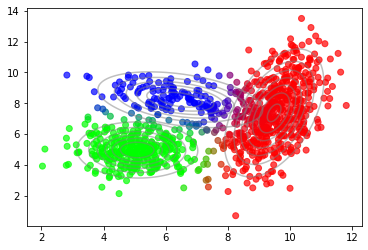

In [32]:
plot_data(X, color=q_best)
plot_densities(X, mu=mu_best, sigma=sigma_best)

In [15]:
import pandas as pd
q_best_df = pd.DataFrame(q_best,columns=['C1','C2','C3'])
q_best_df

,C1,C2,C3
0,1.943114e-09,2.836919e-06,9.999972e-01
1,1.604399e-13,3.986644e-07,9.999996e-01
2,2.206019e-12,4.039777e-10,1.000000e+00
3,9.590593e-07,1.713083e-08,9.999990e-01
4,1.005655e-02,4.072973e-04,9.895362e-01
...,...,...,...
995,1.401509e-01,8.598393e-01,9.860241e-06
996,8.918263e-05,9.998716e-01,3.919971e-05
997,1.601551e-07,9.999998e-01,4.606478e-14
998,1.385640e-02,9.861373e-01,6.321813e-06


### 3.5. Optimal number of components

Usually, we do not know the optimal number of mixture components a priori. But we can get a hint when plotting the lower bound vs. the number of mixture components.

There is a strong increase in the lower bound value until C=3 and then the lower bound more or less doesn’t increase any more. With more components there are of course more options to overfit but the simplest model that reaches a relatively high lower bound value is a GMM with 3 components. This is exactly the number of components used to generate the data.

A more principled approach to determine the optimal number of components requires a Bayesian treatment of model parameters. In this case the lower bound would also take into account model complexity and we would see decreasing lower bound values for C>3 and a maximum at C=3. For details see section 10.2.4 in [1].

## 3.6. Implementation with scikit-learn

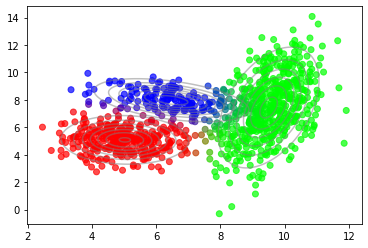

In [11]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, n_init=1)
gmm.fit(X)

plot_data(X, color=gmm.predict_proba(X))
plot_densities(X, mu=gmm.means_, sigma=gmm.covariances_)

In [13]:
import pandas as pd
result_df = gmm.predict_proba(X)
result_df = pd.DataFrame(result_df,columns=['C1','C2','C3'])
result_df.head(10)

,C1,C2,C3
0,0.999998,2.475450e-06,1.787636e-09
1,1.000000,3.358279e-07,1.451687e-13
2,1.000000,3.183240e-10,2.109804e-12
3,0.999999,1.434709e-08,9.352157e-07
4,0.990193,3.619421e-04,9.444744e-03
5,1.000000,3.075277e-11,4.775410e-08
6,0.967008,5.257691e-14,3.299218e-02
7,0.999982,2.909528e-07,1.766894e-05
8,0.974361,4.345660e-04,2.520425e-02
9,0.997876,1.020970e-12,2.124286e-03


In [18]:
q_best_df[['C3','C2','C1']].head(10)

,C3,C2,C1
0,0.999997,2.836919e-06,1.943114e-09
1,1.000000,3.986644e-07,1.604399e-13
2,1.000000,4.039777e-10,2.206019e-12
3,0.999999,1.713083e-08,9.590593e-07
4,0.989536,4.072973e-04,1.005655e-02
5,1.000000,3.916043e-11,4.779348e-08
6,0.968542,7.192582e-14,3.145834e-02
7,0.999981,3.388636e-07,1.828829e-05
8,0.972777,4.895046e-04,2.673370e-02
9,0.997955,1.345039e-12,2.045279e-03


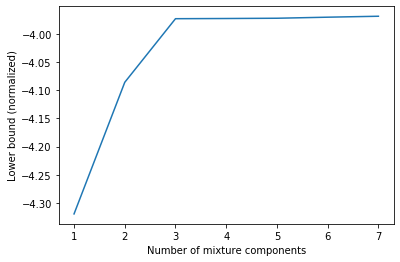

In [25]:
Cs = range(1, 8)
lbs = []

for C in Cs:
    gmm = GaussianMixture(n_components=C, n_init=10)
    gmm.fit(X)
    lbs.append(gmm.lower_bound_)
    
plt.plot(Cs, lbs)
plt.xlabel('Number of mixture components')
plt.ylabel('Lower bound (normalized)');

The lower bound values obtained via gmm.lower_bound_ are normalized i.e. divided by N=1000 in this example.